In [1]:
# Import necessary modules and the postprocessing library

import sys
import pandas as pd
import numpy as np
sys.path.append("../../../")
import glob
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp

In [2]:
# Define the input path and organize them

folder = r'C:\Users\udenzeU\OneDrive - EC-EC\Fuad_Mesh_Dataset\C0_SRB_Runs' ## new line
start_dates = pd.to_datetime('2006-01-01')
end_dates = pd.to_datetime('2016-12-31')

# Extract list of CSV files
csv_files = glob.glob(f"{folder}/**/MESH_output_streamflow.csv")
csv_files = natsorted(csv_files)
# print(csv_files)

station_input = "Stations36_updated.xlsx"


## Single model Analysis

In [3]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files[2], start_date = start_dates)
Stations = pd.read_excel(io=station_input)
Stations = Stations.set_index('Station Number')

The start date for the Data is 2006-01-01


In [4]:
# for key, value in DATAFRAMES.items():
#     print(f"{key}:\n{value.head}")

In [5]:
# Just renaming the column names for comfort

# Get the unique level 1 values (e.g., ['Q50', 'Q90'])
level_1_values = DATAFRAMES["DF_MERGED"].columns.get_level_values(1).unique()

# Repeat the index from other_df to match the column count
new_level_0 = np.repeat(Stations.index, len(level_1_values))

# Rebuild the MultiIndex
DATAFRAMES["DF_MERGED"].columns = pd.MultiIndex.from_arrays([new_level_0, DATAFRAMES["DF_MERGED"].columns.get_level_values(1)])

### DATA MANI

In [6]:
data.daily_aggregate(df=DATAFRAMES["DF_MERGED"])

Station Number 05AA024           05AC003           05AD007            05AG006  \
                QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS     QOSIM1  QOMEAS   
2006/001         16.20  8.251542   1.250  0.934610    41.3  18.313040    52.3   
2006/002         16.20  8.268182   1.260  0.927514    41.9  17.737730    53.0   
2006/003         16.10  8.268285   1.280  0.922706    42.1  16.954540    53.3   
2006/004         16.10  8.265919   1.300  0.919975    42.4  16.726120    54.5   
2006/005         16.10  8.263036   1.350  0.918143    43.1  16.695080    54.1   
...                ...       ...     ...       ...     ...        ...     ...   
2016/362          8.62  0.655629   0.966  0.528861    20.7   7.048034    21.7   
2016/363          8.64  0.652242   1.010  0.534474    22.0   7.042959    22.6   
2016/364          8.63  0.648954   1.030  0.539484    24.5   7.037765    24.3   
2016/365          8.64  0.645164   1.030  0.543866    25.5   7.032383    25.7   
2016/366          8.61  0.642502   1.010  0.547652    25.1   7.026749    25.8   

Station Number            05AJ001            ... 05HD039           05HG001  \
                   QOSIM1  QOMEAS    QOSIM1  ...  QOMEAS    QOSIM1  QOMEAS   
2006/001        19.312690   144.0  77.77477  ...   0.363  0.021097   245.0   
2006/002        19.291240   147.0  77.72770  ...   0.408  0.020869   250.0   
2006/003        19.268370   145.0  77.68994  ...   0.504  0.020657   247.0   
2006/004        19.212070   146.0  77.65980  ...   0.524  0.020458   251.0   
2006/005        19.003410   147.0  77.61514  ...   0.487  0.020272   282.0   
...                   ...     ...       ...  ...     ...       ...     ...   
2016/362         7.151505    82.6  34.76269  ...   1.650  0.099204   294.0   
2016/363         7.145447    85.5  34.57685  ...   1.670  0.092179   291.0   
2016/364         7.139501    86.4  34.38791  ...   1.700  0.085633   290.0   
2016/365         7.133636    85.6  34.19665  ...   1.700  0.079540   291.0   
2016/366         7.127830    83.5  34.00348  ...   1.710  0.073904   296.0   

Station Number           05KD003           05KE002           05KJ001            
                  QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  
2006/001        243.9071   317.0  279.7522     NaN  6.080291   580.0  458.8904  
2006/002        246.0166   312.0  253.4234     NaN  6.043128   577.0  457.1690  
2006/003        263.2702   324.0  287.3772     NaN  6.003728   574.0  445.3347  
2006/004        275.0443   372.0  318.6789     NaN  5.961734   570.0  390.2301  
2006/005        275.7499   569.0  341.7578     NaN  5.921951   565.0  336.3000  
...                  ...     ...       ...     ...       ...     ...       ...  
2016/362        223.4322   301.0  353.2743     NaN  0.802104   646.0  382.5126  
2016/363        223.0046   424.0  353.3249     NaN  0.799029   628.0  381.3967  
2016/364        222.7246   450.0  353.5526     NaN  0.795955   615.0  380.3037  
2016/365        222.7773   413.0  350.5949     NaN  0.792732   603.0  379.8543  
2016/366        224.0186   415.0  349.6316     NaN  0.789295   597.0  379.1852  

[4018 rows x 72 columns]

In [7]:
data.weekly_aggregate(df=DATAFRAMES["DF_MERGED"]) # default method of aggregation is mean

Station Number    05AA024             05AC003              05AD007             \
                   QOMEAS    QOSIM1    QOMEAS    QOSIM1     QOMEAS     QOSIM1   
2005-12-26      16.200000  8.251542  1.250000  0.934610  41.300000  18.313040   
2006-01-02      16.100000  8.262388  1.337143  0.921104  41.528571  16.876756   
2006-01-09      16.014286  8.241057  1.444286  0.947502  38.014286  16.589126   
2006-01-16      16.042857  8.217549  1.342857  0.988841  36.700000  16.471334   
2006-01-23      16.042857  8.192814  1.464286  0.945559  44.714286  16.354024   
...                   ...       ...       ...       ...        ...        ...   
2016-11-28      17.257143  1.011848  0.780857  0.503035  73.400000   8.960993   
2016-12-05       8.894286  0.744000  0.565429  0.525047  24.714286   7.266815   
2016-12-12       8.048571  0.697616  0.797857  0.505303  16.800000   7.118774   
2016-12-19       8.665714  0.672746  0.981143  0.511347  23.914286   7.073929   
2016-12-26       8.640000  0.650614  0.995000  0.536246  23.116667   7.040179   

Station Number    05AG006                05AJ001             ...   05HD039  \
                   QOMEAS     QOSIM1      QOMEAS     QOSIM1  ...    QOMEAS   
2005-12-26      52.300000  19.312690  144.000000  77.774770  ...  0.363000   
2006-01-02      53.314286  18.769256  146.285714  76.702917  ...  0.487429   
2006-01-09      51.842857  17.561850  133.857143  69.667514  ...  0.782714   
2006-01-16      41.728571  17.434634  113.757143  68.823094  ...  0.685429   
2006-01-23      48.371429  17.337234  112.271429  68.464153  ...  0.661000   
...                   ...        ...         ...        ...  ...       ...   
2016-11-28      87.671429  14.667721  127.571429  47.506176  ...  3.131429   
2016-12-05      28.700000   8.568589   89.728571  42.248934  ...  1.677143   
2016-12-12      18.214286   7.344057   78.871429  42.202360  ...  1.695714   
2016-12-19      25.471429   7.190119   82.357143  35.966233  ...  2.132857   
2016-12-26      23.716667   7.142613   83.850000  34.481950  ...  1.680000   

Station Number               05HG001                 05KD003              \
                  QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
2005-12-26      0.021097  245.000000  243.907100  317.000000  279.752200   
2006-01-02      0.020296  274.714286  267.990529  430.428571  328.044043   
2006-01-09      0.019267  315.285714  261.916243  417.285714  400.780671   
2006-01-16      0.018574  357.142857  250.260071  475.714286  401.813371   
2006-01-23      0.018067  384.142857  243.810886  491.285714  387.294100   
...                  ...         ...         ...         ...         ...   
2016-11-28      0.127999  275.285714  198.973514  347.714286  384.900729   
2016-12-05      0.155977  210.285714  242.395557  384.857143  330.819671   
2016-12-12      0.156704  263.285714  235.595914  312.571429  360.243586   
2016-12-19      0.133940  271.000000  228.687014  380.142857  354.470300   
2016-12-26      0.089580  292.500000  223.465933  383.666667  352.514050   

Station Number 05KE002               05KJ001              
                QOMEAS    QOSIM1      QOMEAS      QOSIM1  
2005-12-26         NaN  6.080291  580.000000  458.890400  
2006-01-02         NaN  5.922108  565.857143  384.156400  
2006-01-09         NaN  5.667581  549.428571  431.079029  
2006-01-16         NaN  5.433820  545.285714  455.695214  
2006-01-23         NaN  5.156011  542.142857  443.162157  
...                ...       ...         ...         ...  
2016-11-28         NaN  1.149480  854.714286  430.917814  
2016-12-05         NaN  0.941550  766.428571  385.307743  
2016-12-12         NaN  0.870161  715.285714  381.812843  
2016-12-19         NaN  0.823403  684.714286  385.149100  
2016-12-26         NaN  0.797394  625.666667  380.842917  

[575 rows x 72 columns]

In [8]:
data.yearly_aggregate(df=DATAFRAMES["DF_MERGED"]) # default method of aggregation is mean

Station Number    05AA024              05AC003               05AD007  \
                   QOMEAS     QOSIM1    QOMEAS    QOSIM1      QOMEAS   
2006-01         16.051613   8.225838  1.405484  0.946909   40.580645   
2006-02         15.846429   7.836855  1.571429  0.915010   39.996429   
2006-03         16.003226   7.655809  1.990000  0.950222   44.274194   
2006-04         31.533333  23.350474  4.254000  6.237843   79.793333   
2006-05         95.264516  84.046518  2.136129  1.026433  141.583871   
...                   ...        ...       ...       ...         ...   
2016-08         24.200000  29.918573  2.529677  2.406282   32.632258   
2016-09         24.160000  14.077718  1.651333  1.130971   31.803333   
2016-10         27.822581   9.746621  0.927323  1.156395   69.274194   
2016-11         28.163333   8.297580  0.919933  0.850107   97.903333   
2016-12          9.148387   0.711909  0.824484  0.518178   27.780645   

Station Number                 05AG006                 05AJ001              \
                    QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
2006-01          16.610006   48.712903   17.792504  126.909677   70.970843   
2006-02          15.508414   35.882143   16.574135  106.760714   66.221449   
2006-03          14.299110   46.151613   15.413685  129.729032   52.458506   
2006-04          78.426664   85.846667   71.977764  197.133333  117.830860   
2006-05         220.756065  150.567742  220.634213  237.967742  256.703713   
...                    ...         ...         ...         ...         ...   
2016-08          68.646506   42.858065   94.268124  157.903226  153.630194   
2016-09          46.823969   40.746667   61.136598  108.366667   91.509543   
2016-10          18.652897   75.500000   22.810266  153.593548   57.389961   
2016-11          17.430480  107.773333   19.267389  177.633333   54.710942   
2016-12           7.252084   31.574194    8.251751   88.025806   39.852518   

Station Number  ...   05HD039               05HG001                 05KD003  \
                ...    QOMEAS    QOSIM1      QOMEAS      QOSIM1      QOMEAS   
2006-01         ...  0.650806  0.019036  333.483871  254.645845  455.935484   
2006-02         ...  0.651821  0.017082  384.785714  260.034796  510.750000   
2006-03         ...  2.067484  0.015913  343.806452  190.776139  511.129032   
2006-04         ...  1.373633  0.255665  232.800000  151.608927  729.200000   
2006-05         ...  0.608806  0.028659  241.612903  124.228568  497.967742   
...             ...       ...       ...         ...         ...         ...   
2016-08         ...  1.743548  0.112340   85.151613  164.329645  435.258065   
2016-09         ...  1.052067  0.599634   86.393333  184.826373  493.366667   
2016-10         ...  4.847742  3.314990  166.870968  181.337132  438.774194   
2016-11         ...  4.424833  0.169327  253.966667  197.939163  418.633333   
2016-12         ...  1.986774  0.134511  261.258065  229.418984  357.096774   

Station Number                05KE002                  05KJ001               
                    QOSIM1     QOMEAS      QOSIM1       QOMEAS       QOSIM1  
2006-01         375.934287        NaN    5.525359   551.000000   429.582529  
2006-02         381.921454        NaN    4.551649   544.071429   423.097793  
2006-03         349.828097   3.079032    3.923205   621.774194   392.283106  
2006-04         788.430373  42.630000  129.447612  1367.133333  1698.059350  
2006-05         268.682623  38.916129   26.825047  1231.612903   460.000813  
...                    ...        ...         ...          ...          ...  
2016-08         443.391848  16.401935    4.582728   837.096774   587.681735  
2016-09         520.491270   9.198000    3.699495   909.100000   624.611323  
2016-10         400.217361  28.811613   26.298087   967.258065   752.227632  
2016-11         403.751137        NaN   22.435290  1122.533333   640.480813  
2016-12         357.076681        NaN    0.886834   716.645161   390.551797  

[132 

In [9]:
data.monthly_aggregate(df=DATAFRAMES["DF_MERGED"]) # default method of aggregation is mean

Station Number    05AA024              05AC003               05AD007  \
                   QOMEAS     QOSIM1    QOMEAS    QOSIM1      QOMEAS   
2006-01         16.051613   8.225838  1.405484  0.946909   40.580645   
2006-02         15.846429   7.836855  1.571429  0.915010   39.996429   
2006-03         16.003226   7.655809  1.990000  0.950222   44.274194   
2006-04         31.533333  23.350474  4.254000  6.237843   79.793333   
2006-05         95.264516  84.046518  2.136129  1.026433  141.583871   
...                   ...        ...       ...       ...         ...   
2016-08         24.200000  29.918573  2.529677  2.406282   32.632258   
2016-09         24.160000  14.077718  1.651333  1.130971   31.803333   
2016-10         27.822581   9.746621  0.927323  1.156395   69.274194   
2016-11         28.163333   8.297580  0.919933  0.850107   97.903333   
2016-12          9.148387   0.711909  0.824484  0.518178   27.780645   

Station Number                 05AG006                 05AJ001              \
                    QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
2006-01          16.610006   48.712903   17.792504  126.909677   70.970843   
2006-02          15.508414   35.882143   16.574135  106.760714   66.221449   
2006-03          14.299110   46.151613   15.413685  129.729032   52.458506   
2006-04          78.426664   85.846667   71.977764  197.133333  117.830860   
2006-05         220.756065  150.567742  220.634213  237.967742  256.703713   
...                    ...         ...         ...         ...         ...   
2016-08          68.646506   42.858065   94.268124  157.903226  153.630194   
2016-09          46.823969   40.746667   61.136598  108.366667   91.509543   
2016-10          18.652897   75.500000   22.810266  153.593548   57.389961   
2016-11          17.430480  107.773333   19.267389  177.633333   54.710942   
2016-12           7.252084   31.574194    8.251751   88.025806   39.852518   

Station Number  ...   05HD039               05HG001                 05KD003  \
                ...    QOMEAS    QOSIM1      QOMEAS      QOSIM1      QOMEAS   
2006-01         ...  0.650806  0.019036  333.483871  254.645845  455.935484   
2006-02         ...  0.651821  0.017082  384.785714  260.034796  510.750000   
2006-03         ...  2.067484  0.015913  343.806452  190.776139  511.129032   
2006-04         ...  1.373633  0.255665  232.800000  151.608927  729.200000   
2006-05         ...  0.608806  0.028659  241.612903  124.228568  497.967742   
...             ...       ...       ...         ...         ...         ...   
2016-08         ...  1.743548  0.112340   85.151613  164.329645  435.258065   
2016-09         ...  1.052067  0.599634   86.393333  184.826373  493.366667   
2016-10         ...  4.847742  3.314990  166.870968  181.337132  438.774194   
2016-11         ...  4.424833  0.169327  253.966667  197.939163  418.633333   
2016-12         ...  1.986774  0.134511  261.258065  229.418984  357.096774   

Station Number                05KE002                  05KJ001               
                    QOSIM1     QOMEAS      QOSIM1       QOMEAS       QOSIM1  
2006-01         375.934287        NaN    5.525359   551.000000   429.582529  
2006-02         381.921454        NaN    4.551649   544.071429   423.097793  
2006-03         349.828097   3.079032    3.923205   621.774194   392.283106  
2006-04         788.430373  42.630000  129.447612  1367.133333  1698.059350  
2006-05         268.682623  38.916129   26.825047  1231.612903   460.000813  
...                    ...        ...         ...          ...          ...  
2016-08         443.391848  16.401935    4.582728   837.096774   587.681735  
2016-09         520.491270   9.198000    3.699495   909.100000   624.611323  
2016-10         400.217361  28.811613   26.298087   967.258065   752.227632  
2016-11         403.751137        NaN   22.435290  1122.533333   640.480813  
2016-12         357.076681        NaN    0.886834   716.645161   390.551797  

[132 

In [10]:
data.stat_aggregate(df=DATAFRAMES["DF_MERGED"], method='q25')

05AA024   05AC003    05AD007    05AG006   05AJ001   05BA001  \
                 Q25       Q25        Q25        Q25       Q25       Q25   
2006-01-01  8.251542  0.934610  18.313040  19.312690  77.77477  1.183666   
2006-01-02  8.268182  0.927514  17.737730  19.291240  77.72770  1.172835   
2006-01-03  8.268285  0.922706  16.954540  19.268370  77.68994  1.161657   
2006-01-04  8.265919  0.919975  16.726120  19.212070  77.65980  1.150785   
2006-01-05  8.263036  0.918143  16.695080  19.003410  77.61514  1.140337   
...              ...       ...        ...        ...       ...       ...   
2016-12-27  0.655629  0.528861   7.048034   7.151505  34.76269  1.259803   
2016-12-28  0.652242  0.534474   7.042959   7.145447  34.57685  1.248078   
2016-12-29  0.648954  0.539484   7.037765   7.139501  34.38791  1.236539   
2016-12-30  0.645164  0.543866   7.032383   7.133636  34.19665  1.225125   
2016-12-31  0.642502  0.547652   7.026749   7.127830  34.00348  1.213826   

             05BB001   05BG010   05BH004   05BL024  ...   05FA001   05FC001  \
                 Q25       Q25       Q25       Q25  ...       Q25       Q25   
2006-01-01  5.252231  0.431461  52.85093  1.342807  ...  0.002308  0.027697   
2006-01-02  5.207210  0.425622  48.89791  1.334097  ...  0.002239  0.026929   
2006-01-03  5.161536  0.419869  47.83511  1.325669  ...  0.002174  0.026189   
2006-01-04  5.116543  0.414203  47.67530  1.318301  ...  0.002110  0.025478   
2006-01-05  5.070806  0.408606  47.65258  1.306869  ...  0.002049  0.024793   
...              ...       ...       ...       ...  ...       ...       ...   
2016-12-27  4.608318  0.279653  21.76819  0.370559  ...  0.017074  0.064395   
2016-12-28  4.566650  0.277161  21.25079  0.361210  ...  0.016876  0.062579   
2016-12-29  4.525266  0.274679  20.95304  0.352394  ...  0.016695  0.060817   
2016-12-30  4.478406  0.272189  20.67565  0.344078  ...  0.016528  0.059110   
2016-12-31  4.433925  0.269717  20.40675  0.336003  ...  0.016373  0.057458   

             05FC008   05FE004   05GG001   05HD039   05HG001   05KD003  \
                 Q25       Q25       Q25       Q25       Q25       Q25   
2006-01-01  0.609218  6.532234  131.1006  0.021097  243.9071  279.7522   
2006-01-02  0.607228  6.504723  130.5874  0.020869  246.0166  253.4234   
2006-01-03  0.605276  6.477517  130.1418  0.020657  263.2702  287.3772   
2006-01-04  0.603361  6.450729  129.7527  0.020458  275.0443  318.6789   
2006-01-05  0.601481  6.424485  129.4009  0.020272  275.7499  341.7578   
...              ...       ...       ...       ...       ...       ...   
2016-12-27  0.116672  0.393923  114.1589  0.099204  223.4322  353.2743   
2016-12-28  0.114247  0.392005  113.7905  0.092179  223.0046  353.3249   
2016-12-29  0.111877  0.389987  113.4777  0.085633  222.7246  353.5526   
2016-12-30  0.109558  0.387873  113.2033  0.079540  222.7773  350.5949   
2016-12-31  0.107288  0.385667  112.9515  0.073904  224.0186  349.6316   

             05KE002   05KJ001  
                 Q25       Q25  
2006-01-01  6.080291  458.8904  
2006-01-02  6.043128  457.1690  
2006-01-03  6.003728  445.3347  
2006-01-04  5.961734  390.2301  
2006-01-05  5.921951  336.3000  
...              ...       ...  
2016-12-27  0.802104  382.5126  
2016-12-28  0.799029  381.3967  
2016-12-29  0.795955  380.3037  
2016-12-30  0.792732  379.8543  
2016-12-31  0.789295  379.1852  

[4018 rows x 36 columns]

In [11]:
data.seasonal_period(df=DATAFRAMES["DF_MERGED"], daily_period=('01-01', '01-02'))

Station Number 05AA024           05AC003           05AD007           05AG006  \
                QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS   
2006-01-01       16.20  8.251542    1.25  0.934610    41.3  18.31304    52.3   
2006-01-02       16.20  8.268182    1.26  0.927514    41.9  17.73773    53.0   
2007-01-01        9.10  7.574007    2.02  0.921738    26.2  14.24428    25.5   
2007-01-02        9.20  7.479002    1.99  0.922230    25.9  13.98564    26.0   
2008-01-01        6.95  7.139231    1.37  0.605778    15.1  13.70300    15.2   
2008-01-02        6.96  6.811264    1.39  0.601963    15.3  13.42262    15.4   
2009-01-01        6.39  7.350643    1.19  0.862521    14.3  14.53170    14.8   
2009-01-02        6.45  7.022185    1.16  0.856276    14.0  14.19905    15.1   
2010-01-01        8.98  7.476358    1.01  1.047090    21.4  14.73377    21.2   
2010-01-02        8.99  7.253150    1.03  1.037748    20.6  14.40598    21.7   
2011-01-01        9.00  7.787050    1.50  0.923365    16.3  18.98729    22.1   
2011-01-02        8.95  7.732389    1.69  0.918245    16.4  18.35023    20.8   
2012-01-01        7.90  8.070479    2.06  1.393622    12.6  20.44582    26.0   
2012-01-02        7.90  8.091578    2.36  1.382387    12.8  19.96352    23.8   
2013-01-01       10.80  7.525808    2.77  0.950668    37.9  15.63173    30.8   
2013-01-02       10.80  7.457079    2.64  0.955941    34.9  15.31976    33.6   
2014-01-01       11.30  7.595787    1.36  1.107065    23.2  15.19819    25.4   
2014-01-02       11.30  7.609137    1.49  1.097640    22.8  14.90612    25.3   
2015-01-01       26.80  7.900675    1.52  1.524400    28.4  18.24953    29.7   
2015-01-02       26.70  7.924412    1.25  1.516831    21.1  17.93136    23.9   
2016-01-01        8.33  7.190937    1.44  1.203622    12.9  12.24120    14.2   
2016-01-02        8.35  6.869358    1.46  1.200118    13.3  12.05626    14.7   

Station Number           05AJ001            ... 05HD039           05HG001  \
                  QOSIM1  QOMEAS    QOSIM1  ...  QOMEAS    QOSIM1  QOMEAS   
2006-01-01      19.31269   144.0  77.77477  ...   0.363  0.021097   245.0   
2006-01-02      19.29124   147.0  77.72770  ...   0.408  0.020869   250.0   
2007-01-01      14.79415    80.0  36.68124  ...   0.485  0.013376   222.0   
2007-01-02      14.79080    78.0  36.41800  ...   0.500  0.013154   222.0   
2008-01-01      14.03154    74.4  47.24660  ...   0.355  0.021484   273.0   
2008-01-02      14.02774    76.7  46.42064  ...   0.397  0.020721   263.0   
2009-01-01      14.86200    82.0  42.75371  ...   0.258  0.011502   244.0   
2009-01-02      14.84131    80.0  42.53064  ...   0.250  0.011217   240.0   
2010-01-01      15.00730    77.7  51.49640  ...   0.261  0.006802   234.0   
2010-01-02      14.98798    76.5  51.20120  ...   0.244  0.006723   243.0   
2011-01-01      19.23319    82.9  48.48144  ...   0.944  0.028696   247.0   
2011-01-02      19.20564    78.5  48.26020  ...   1.180  0.028410   247.0   
2012-01-01      21.48075    87.1  63.04525  ...   1.090  0.175319   290.0   
2012-01-02      21.43509    77.4  62.78666  ...   1.270  0.174007   313.0   
2013-01-01      16.22494    75.5  56.77446  ...   0.573  0.021697   289.0   
2013-01-02      16.18961    89.3  56.54439  ...   0.603  0.021591   293.0   
2014-01-01      15.89087    93.4  57.67400  ...   0.901  0.013681   303.0   
2014-01-02      15.86760    85.5  57.36128  ...   0.900  0.013576   302.0   
2015-01-01      19.19434    67.8  81.22303  ...   1.300  0.011173   252.0   
2015-01-02      19.14485    62.8  81.08855  ...   1.210  0.011033   243.0   
2016-01-01      12.88279    62.3  51.63991  ...   0.184  0.011771   229.0   
2016-01-02      12.77215    64.6  51.15221  ...   0.207  0.011522   209.0   

Station Number           05KD003           05KE002           05KJ001            
                  QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  
2006-01-01      243.9071   317.0  279.7522     NaN  6.080291   580.0

In [12]:
data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"]) # As usual the default aggregation method is mean/average

Station Number    05AA024             05AC003              05AD007             \
                   QOMEAS    QOSIM1    QOMEAS    QOSIM1     QOMEAS     QOSIM1   
jday                                                                            
1               11.068182  7.623865  1.590000  1.043135  22.690909  16.025414   
2               11.072727  7.501612  1.610909  1.037899  21.727273  15.661661   
3               11.114545  7.477458  1.546727  1.033031  21.281818  15.060059   
4               11.160909  7.470017  1.585455  1.029967  20.927273  14.761656   
5               11.213636  7.465469  1.642727  1.028979  20.409091  14.645289   
...                   ...       ...       ...       ...        ...        ...   
362             10.327273  7.086695  1.419818  1.011742  20.009091  15.128755   
363             10.329091  7.084431  1.495455  1.011954  20.200000  15.101584   
364             10.346364  7.082186  1.597273  1.011607  20.527273  15.075794   
365             10.348182  7.079909  1.551818  1.010601  20.609091  15.050649   
366              8.576667  5.331896  1.383333  0.786592  25.800000  12.432943   

Station Number    05AG006               05AJ001             ...   05HD039  \
                   QOMEAS     QOSIM1     QOMEAS     QOSIM1  ...    QOMEAS   
jday                                                        ...             
1               25.200000  16.628596  84.281818  55.890074  ...  0.610364   
2               24.845455  16.595819  83.300000  55.590134  ...  0.651727   
3               25.072727  16.566723  82.000000  55.238464  ...  0.544545   
4               25.400000  16.522690  83.927273  54.855249  ...  0.473727   
5               25.781818  16.393980  86.290909  54.449069  ...  0.498818   
...                   ...        ...        ...        ...  ...       ...   
362             22.309091  15.724457  77.600000  53.060251  ...  0.774727   
363             22.218182  15.667003  78.745455  52.794602  ...  0.743545   
364             22.281818  15.611506  80.981818  52.521131  ...  0.811636   
365             22.527273  15.564291  81.245455  52.239721  ...  0.832091   
366             22.566667  12.757130  78.933333  44.663073  ...  0.824667   

Station Number               05HG001                 05KD003              \
                  QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
jday                                                                       
1               0.030600  257.090909  231.309264  336.909091  275.303045   
2               0.030257  256.818182  232.405536  341.000000  253.766491   
3               0.029927  251.000000  243.117736  364.727273  263.590873   
4               0.029610  256.909091  251.656918  377.545455  286.812655   
5               0.029305  256.363636  252.713245  415.909091  309.169045   
...                  ...         ...         ...         ...         ...   
362             0.039169  241.636364  232.275618  303.363636  367.953491   
363             0.038151  246.000000  231.567245  288.090909  366.944364   
364             0.037191  245.909091  230.985891  311.090909  365.728291   
365             0.036287  252.727273  230.286855  339.454545  364.134518   
366             0.035837  276.000000  227.051633  336.666667  360.720500   

Station Number 05KE002               05KJ001              
                QOMEAS    QOSIM1      QOMEAS      QOSIM1  
jday                                                      
1                  NaN  1.185507  390.090909  385.450218  
2                  NaN  1.179464  388.363636  384.061418  
3                  NaN  1.173183  388.909091  377.242455  
4                  NaN  1.166656  390.545455  339.648564  
5                  NaN  1.160344  393.272727  294.889764  
...                ...       ...         ...         ...  
362                NaN  0.716424  407.636364  378.881791  
363                NaN  0.713457  401.636364  379.824609  
364                NaN  0.710537  397.636364  379.922091  
365          

In [13]:
data.stat_aggregate(df=data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = 'median'), method='median')

05AA024   05AC003   05AD007   05AG006   05AJ001   05BA001   05BB001  \
        MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN   
jday                                                                         
1     7.574007  0.950668  15.19819  15.89087  51.63991  1.183666  4.117046   
2     7.479002  0.955941  14.90612  15.86760  51.20120  1.172835  4.069810   
3     7.458900  0.960607  14.44986  15.84433  50.94381  1.161657  4.022910   
4     7.451136  0.964515  14.24045  15.80896  50.72528  1.150785  3.976928   
5     7.445426  0.962528  14.19060  15.71270  50.53224  1.137722  3.931897   
...        ...       ...       ...       ...       ...       ...       ...   
362   7.692451  0.945497  14.85478  15.08812  52.63409  1.249459  4.298340   
363   7.690284  0.933742  14.83068  15.06748  52.38522  1.234790  4.253545   
364   7.688163  0.929169  14.80670  15.04713  52.10855  1.220329  4.209558   
365   7.686083  0.935499  14.78280  15.02705  51.80764  1.206072  4.163783   
366   7.605867  0.867881  14.58051  14.88280  42.98656  1.213826  4.433925   

       05BG010   05BH004   05BL024  ...   05FA001   05FC001   05FC008  \
        MEDIAN    MEDIAN    MEDIAN  ...    MEDIAN    MEDIAN    MEDIAN   
jday                                ...                                 
1     0.308214  33.28933  1.342807  ...  0.004772  0.050001  0.256009   
2     0.304629  38.48943  1.334097  ...  0.004566  0.048351  0.253426   
3     0.301090  41.11936  1.325669  ...  0.004372  0.046769  0.250904   
4     0.297592  41.14963  1.318301  ...  0.004189  0.045253  0.248438   
5     0.294149  40.75410  1.306869  ...  0.004017  0.043800  0.246026   
...        ...       ...       ...  ...       ...       ...       ...   
362   0.293281  33.15593  0.811968  ...  0.017074  0.062028  0.227518   
363   0.290606  33.01368  0.794124  ...  0.016876  0.061076  0.222977   
364   0.287977  32.87157  0.780021  ...  0.016695  0.060177  0.218616   
365   0.285383  32.73086  0.769722  ...  0.016528  0.059110  0.214426   
366   0.269717  22.63276  1.470117  ...  0.016373  0.057458  0.210399   

       05FE004   05GG001   05HD039   05HG001   05KD003   05KE002   05KJ001  
        MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN  
jday                                                                        
1     0.742731  115.1368  0.013681  228.8185  275.3788  0.628797  379.0888  
2     0.741573  114.8739  0.013576  229.2393  254.0947  0.625451  379.0011  
3     0.740326  114.6126  0.013478  238.8437  255.5462  0.622218  374.1664  
4     0.738977  114.3529  0.013386  246.5980  278.5749  0.619057  339.4591  
5     0.737517  114.0947  0.013299  247.5860  302.3437  0.615910  292.4359  
...        ...       ...       ...       ...       ...       ...       ...  
362   0.718802  115.9537  0.014442  230.2822  361.1377  0.642829  382.3588  
363   0.711583  115.5785  0.014146  230.2680  360.6638  0.639264  381.3967  
364   0.704597  115.2513  0.013911  229.3687  357.9292  0.635741  380.3037  
365   0.697835  114.9539  0.013792  228.4871  359.7653  0.632243  379.8543  
366   0.985606  113.6510  0.021806  227.4222  349.6316  0.526121  379.1852  

[366 rows x 36 columns]

In [14]:
# DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files[2], start_date = start_dates,
#                                       daily_agg = True, da_method = 'min',
#                                       weekly_agg = True, wa_method = 'min',
#                                       monthly_agg = True, ma_method = 'inst', 
#                                       yearly_agg = True, ya_method = 'sum',
#                                       stat_agg = True, stat_method = 'q75',
#                                       seasonal_p = True, sp_dperiod = ('05-01', '08-30'), sp_subset = ('1981-01-01', '1985-12-31'),
#                                       long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
#                                      )


# for key, value in DATAFRAMES.items():
#     print(f"{key}:\n{value}")

## Metrics

In [15]:
# The Time to Peak for the simulated data will look like 
print(metrics.time_to_peak(df=DATAFRAMES['DF_SIMULATED']))

# The time to peak for the observed data looks like:-
print(metrics.time_to_peak(df=DATAFRAMES['DF_OBSERVED']))

             ttp
Station         
Station 5  163.0
Station 5  185.0
Station 5  165.0
Station 5  165.0
Station 5  170.0
Station 5  199.0
Station 5  158.0
Station 5  173.0
Station 5  160.0
Station 5  163.0
Station 5  162.0
Station 5  166.0
Station 5  167.0
Station 5  166.0
Station 5  186.0
Station 5  173.0
Station 5  175.0
Station 5  176.0
Station 5  168.0
Station 5  167.0
Station 5  170.0
Station 5  167.0
Station 5  130.0
Station 5  142.0
Station 5  141.0
Station 5  168.0
Station 5  137.0
Station 5  141.0
Station 5  145.0
Station 5  167.0
Station 5  160.0
Station 5  142.0
Station 5  197.0
Station 5  173.0
Station 5  144.0
Station 5  132.0
             ttp
Station         
Station 5  162.0
Station 5  174.0
Station 5  162.0
Station 5  163.0
Station 5  170.0
Station 5  175.0
Station 5  167.0
Station 5  187.0
Station 5  169.0
Station 5  161.0
Station 5  168.0
Station 5  159.0
Station 5  150.0
Station 5  164.0
Station 5  151.0
Station 5  152.0
Station 5  148.0
Station 5  142.0
Station 5  177

In [16]:
# The Time to Centre of Mass for the simulated data will look like 
print(metrics.time_to_centre_of_mass(df=DATAFRAMES['DF_SIMULATED']))

# The time to Centre of Mass for the observed data looks like:-
print(metrics.time_to_centre_of_mass(df=DATAFRAMES['DF_OBSERVED']))

           ttcom
Station         
Station 5  184.0
Station 5  188.0
Station 5  181.0
Station 5  185.0
Station 5  186.0
Station 5  202.0
Station 5  192.0
Station 5  177.0
Station 5  187.0
Station 5  172.0
Station 5  184.0
Station 5  184.0
Station 5  184.0
Station 5  194.0
Station 5  174.0
Station 5  184.0
Station 5  184.0
Station 5  186.0
Station 5  190.0
Station 5  195.0
Station 5  199.0
Station 5  188.0
Station 5  141.0
Station 5  143.0
Station 5  154.0
Station 5  187.0
Station 5  154.0
Station 5  162.0
Station 5  167.0
Station 5  167.0
Station 5  184.0
Station 5  163.0
Station 5  191.0
Station 5  186.0
Station 5  158.0
Station 5  182.0
           ttcom
Station         
Station 5  177.0
Station 5  184.0
Station 5  173.0
Station 5  175.0
Station 5  178.0
Station 5    0.0
Station 5  193.0
Station 5  199.0
Station 5  184.0
Station 5  175.0
Station 5    0.0
Station 5    0.0
Station 5  180.0
Station 5  194.0
Station 5  169.0
Station 5  178.0
Station 5  174.0
Station 5  175.0
Station 5  193

In [17]:
# The Spring Pulse Onset for the simulated data will look like 
print(metrics.SpringPulseOnset(df=DATAFRAMES['DF_SIMULATED']))

# The Spring Pulse Onset for the observed data looks like:-
print(metrics.SpringPulseOnset(df=DATAFRAMES['DF_OBSERVED']))

             SPOD
Station          
Station 1   126.0
Station 2   120.0
Station 3   119.0
Station 4   122.0
Station 5   121.0
Station 6   136.0
Station 7   125.0
Station 8   119.0
Station 9   132.0
Station 10  105.0
Station 11  117.0
Station 12  124.0
Station 13  124.0
Station 14  131.0
Station 15  120.0
Station 16  137.0
Station 17  135.0
Station 18  134.0
Station 19  123.0
Station 20  114.0
Station 21  138.0
Station 22  115.0
Station 23   98.3
Station 24   83.2
Station 25  104.0
Station 26  114.0
Station 27  111.0
Station 28  107.0
Station 29  107.0
Station 30  108.0
Station 31  110.0
Station 32  128.0
Station 33  178.0
Station 34  127.0
Station 35  101.0
Station 36  106.0
             SPOD
Station          
Station 1   113.0
Station 2   108.0
Station 3   111.0
Station 4   114.0
Station 5   115.0
Station 6     NaN
Station 7   134.0
Station 8   170.0
Station 9   134.0
Station 10  112.0
Station 11   55.6
Station 12   66.0
Station 13  147.0
Station 14  137.0
Station 15  113.0
Station 16

In [18]:
# Mean square error for the data we were given
print(metrics.rmse(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED']))

             model1
Station 1    38.490
Station 2     3.628
Station 3    74.220
Station 4    74.050
Station 5   118.400
Station 6     8.221
Station 7    26.370
Station 8     8.293
Station 9    48.550
Station 10   24.930
Station 11   73.540
Station 12   74.480
Station 13   67.020
Station 14   21.970
Station 15   10.450
Station 16   36.920
Station 17   51.150
Station 18   60.480
Station 19   23.970
Station 20   92.300
Station 21   29.180
Station 22  107.100
Station 23    7.273
Station 24    3.127
Station 25    8.159
Station 26  128.200
Station 27    4.289
Station 28   10.000
Station 29   13.080
Station 30   13.010
Station 31  151.500
Station 32    6.576
Station 33  164.900
Station 34  292.000
Station 35   60.490
Station 36  453.100


In [19]:
# Root Mean square error for the data we were given
print(metrics.nse(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED']))

              model1
Station 1   0.583300
Station 2  -0.784500
Station 3   0.689300
Station 4   0.687800
Station 5   0.749000
Station 6   0.490100
Station 7   0.604000
Station 8  -0.000706
Station 9   0.532300
Station 10  0.779300
Station 11  0.763700
Station 12  0.764800
Station 13  0.704300
Station 14  0.714800
Station 15  0.317700
Station 16  0.671200
Station 17  0.499800
Station 18  0.403300
Station 19 -0.159300
Station 20 -0.186100
Station 21  0.536700
Station 22  0.499200
Station 23 -1.225000
Station 24 -0.272300
Station 25 -2.729000
Station 26  0.403000
Station 27  0.146100
Station 28  0.047750
Station 29  0.133500
Station 30  0.124100
Station 31  0.376100
Station 32 -0.164700
Station 33  0.306000
Station 34  0.284000
Station 35 -3.524000
Station 36 -0.169600


In [20]:
# Mean Average error for the data we were given
print(metrics.kge(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED']))

            model1
Station 1   0.5204
Station 2   0.1888
Station 3   0.7645
Station 4   0.7871
Station 5   0.7934
Station 6   0.6496
Station 7   0.4837
Station 8   0.4798
Station 9   0.5604
Station 10  0.6156
Station 11  0.7653
Station 12  0.7632
Station 13  0.6993
Station 14  0.8456
Station 15  0.5165
Station 16  0.7587
Station 17  0.6101
Station 18  0.6116
Station 19  0.3055
Station 20  0.2726
Station 21  0.7361
Station 22  0.7028
Station 23  0.1298
Station 24  0.4044
Station 25 -0.2552
Station 26  0.6826
Station 27  0.3307
Station 28  0.2464
Station 29  0.2336
Station 30  0.4044
Station 31  0.6700
Station 32 -0.1087
Station 33  0.5212
Station 34  0.6574
Station 35 -0.4212
Station 36  0.4619


In [21]:
# Nash-Sutcliffe Efficiency for the data we were given
print(metrics.lognse(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED']))

               model1
Station 1    0.542600
Station 2   -0.741000
Station 3    0.402000
Station 4    0.290600
Station 5    0.142000
Station 6    0.009106
Station 7    0.117400
Station 8  -10.930000
Station 9   -0.868700
Station 10  -0.431700
Station 11   0.060580
Station 12   0.264100
Station 13  -0.133000
Station 14   0.571700
Station 15  -3.215000
Station 16   0.604600
Station 17   0.542000
Station 18   0.552700
Station 19  -0.454600
Station 20  -1.006000
Station 21   0.221800
Station 22  -0.311500
Station 23  -0.581800
Station 24  -0.315300
Station 25   0.022060
Station 26  -0.108300
Station 27  -1.341000
Station 28   0.088830
Station 29   0.262300
Station 30   0.392100
Station 31   0.238600
Station 32 -10.750000
Station 33   0.289100
Station 34   0.225400
Station 35  -1.238000
Station 36   0.099630


In [22]:
# metrices = ["RMSE", "KGE", "NSE", "LogNSE", "TTP_OBS", "TTP_SIM",  "TTCOM_OBS", "TTCOM_SIM",  "SPOD_OBS", "SPOD_SIM"]
# metrics.calculate_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED'],
#                                             metrices=metrices)

In [23]:
# metrics.calculate_all_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED'],
# #                          format='txt', out='metrics'
#                          )

# Visuals

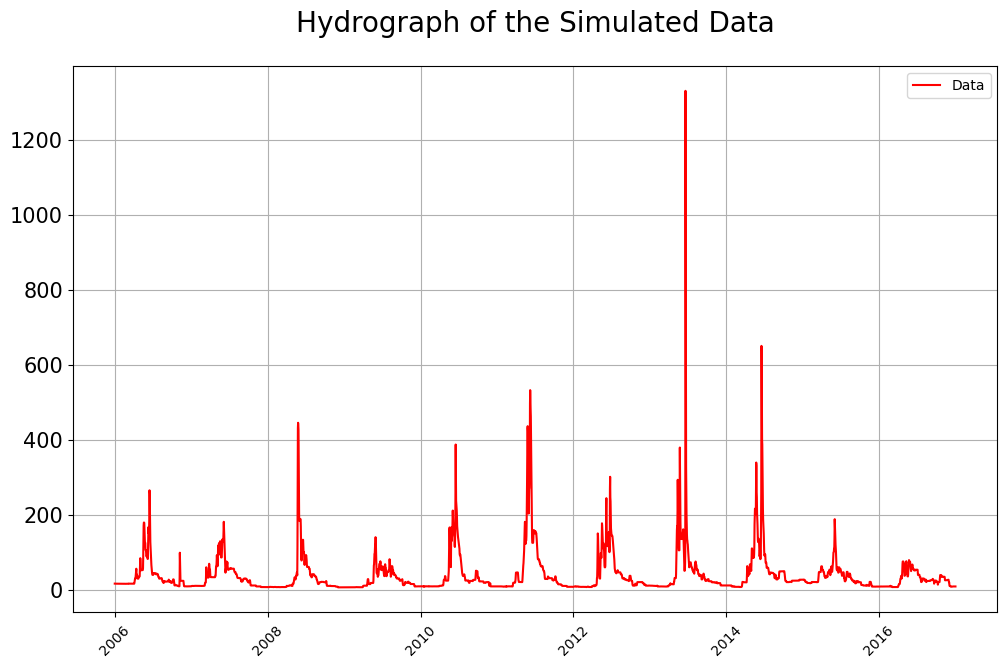

In [24]:
# A very simple line plot can be generated as shown below
# Just plotting the simulated data from the first station
visuals.plot(
    df = DATAFRAMES["DF_OBSERVED"].iloc[:, [0]],
    title='Hydrograph of the Simulated Data',
    grid=True,
)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


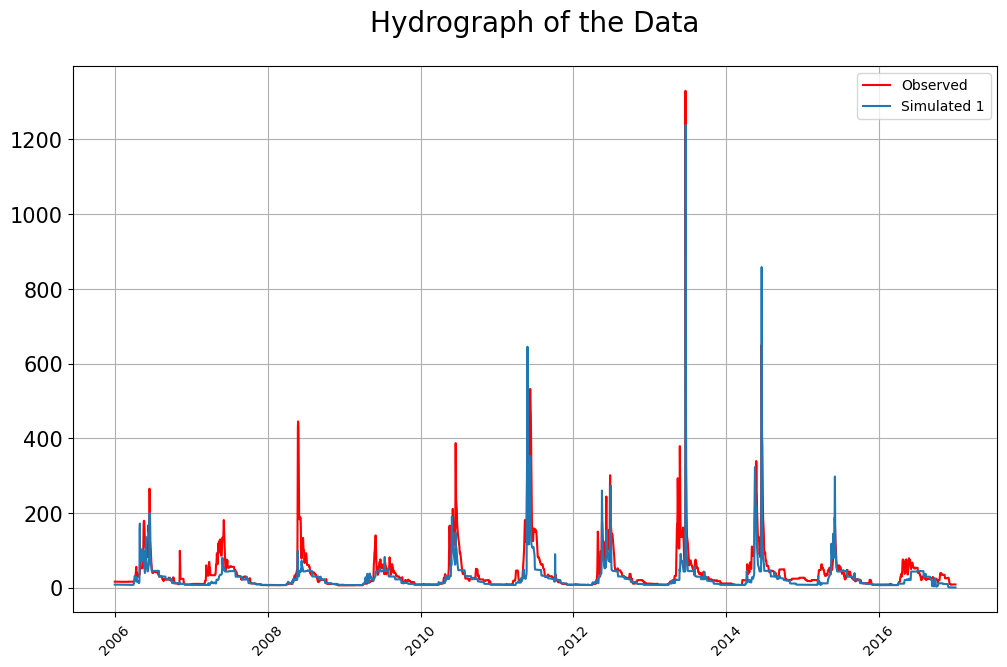

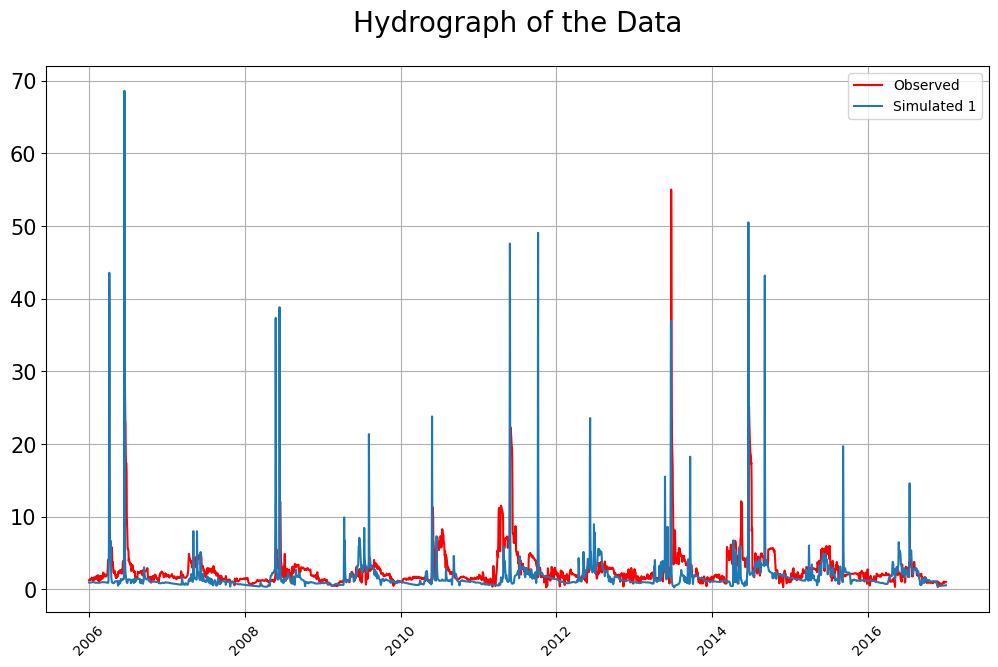

In [29]:
# Plotting both Observed and Simulated combined
visuals.plot(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, [0, 1, 2, 3]],
    title='Hydrograph of the Data',
    grid=True,
)

Number of simulated data columns: 1
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


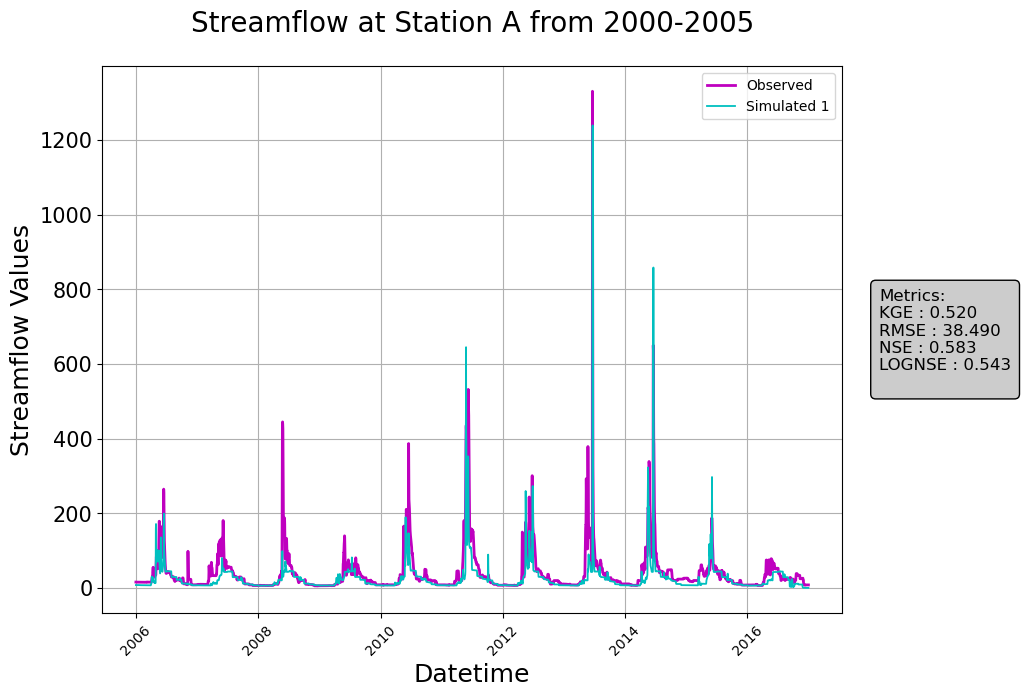

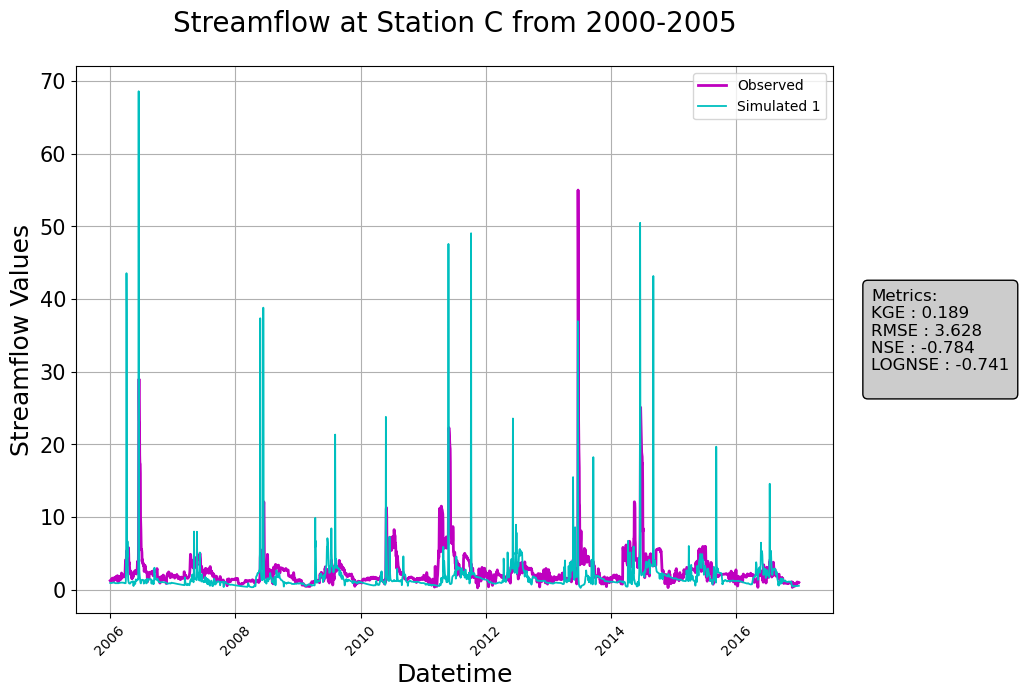

In [26]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, [0, 1, 2, 3]],
    # including multiple plot titles
    title=['Streamflow at Station A from 2000-2005', 'Streamflow at Station C from 2000-2005'],
    fig_size=(10, 6),
    linestyles=('m-', 'c-'),
    labels=['Datetime', 'Streamflow Values'],
    linewidth=(2, 1.3),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE', 'LOGNSE'],
    grid=True,
    )

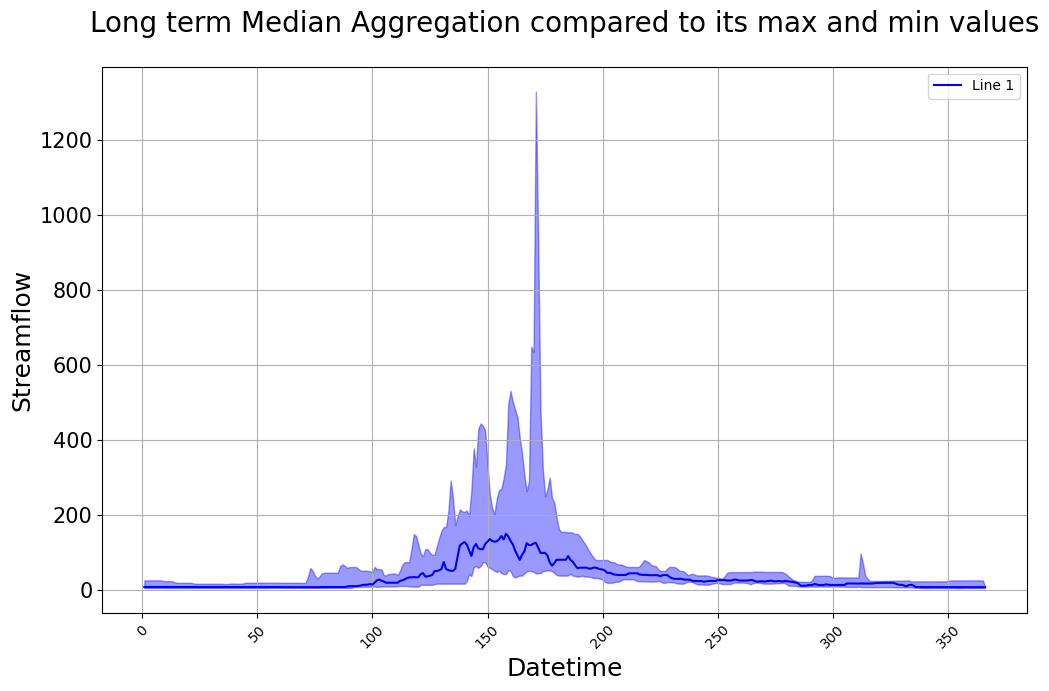

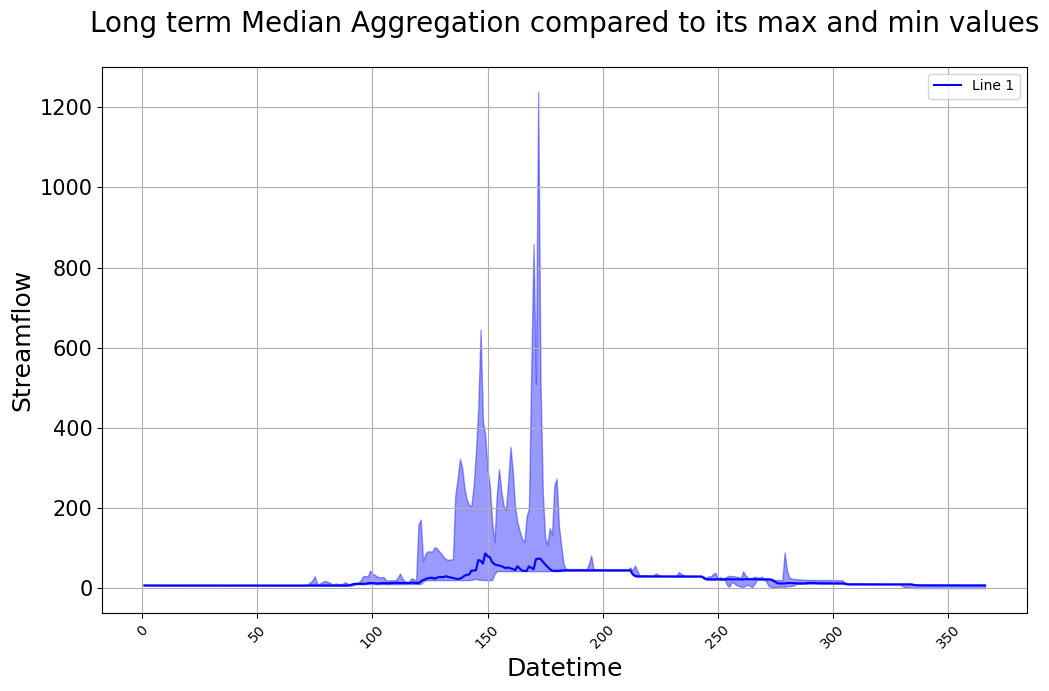

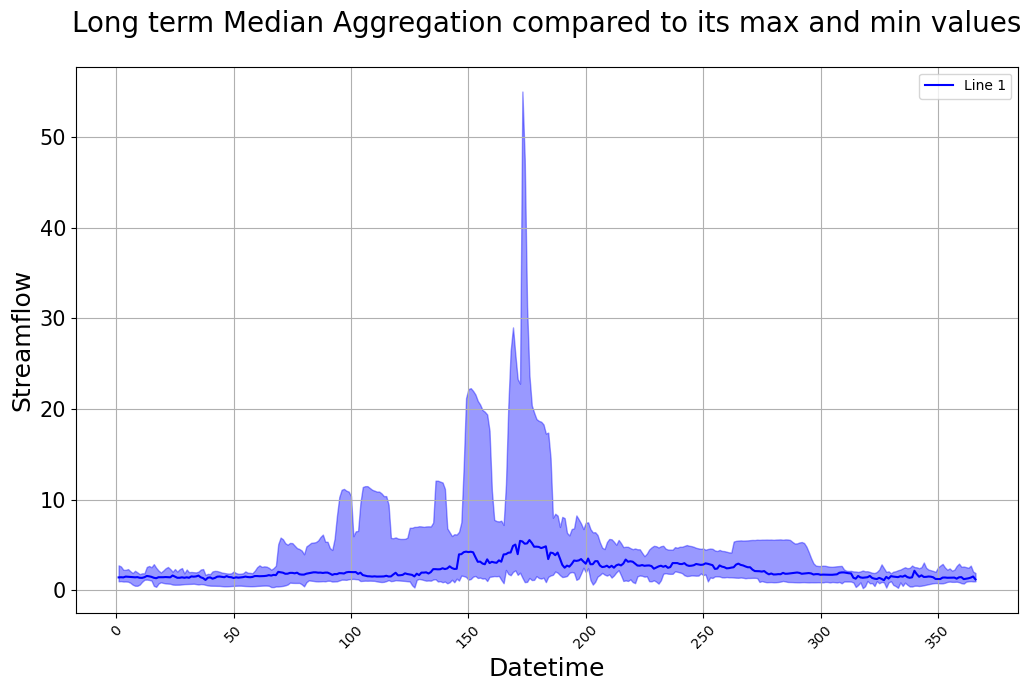

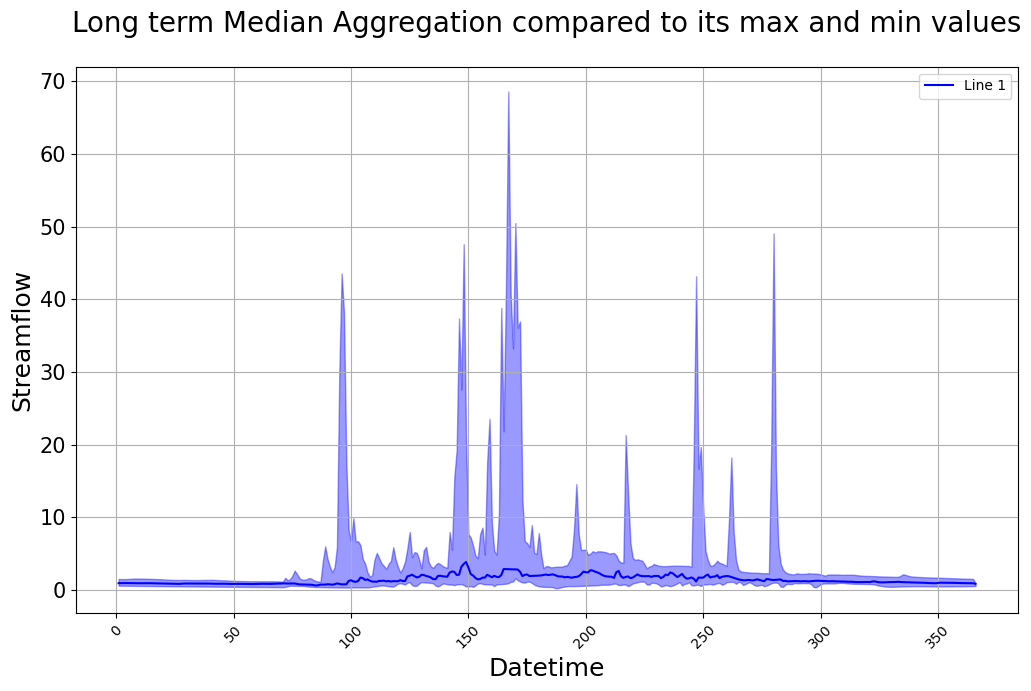

In [27]:
visuals.bounded_plot(
    lines = data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "median").iloc[:, [0,1, 2, 3]],
    upper_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "max").iloc[:, [0,1,2,3]]],
    lower_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "min").iloc[:, [0,1,2,3]]],
    linestyles=['b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = 'Long term Median Aggregation compared to its max and min values'
    )

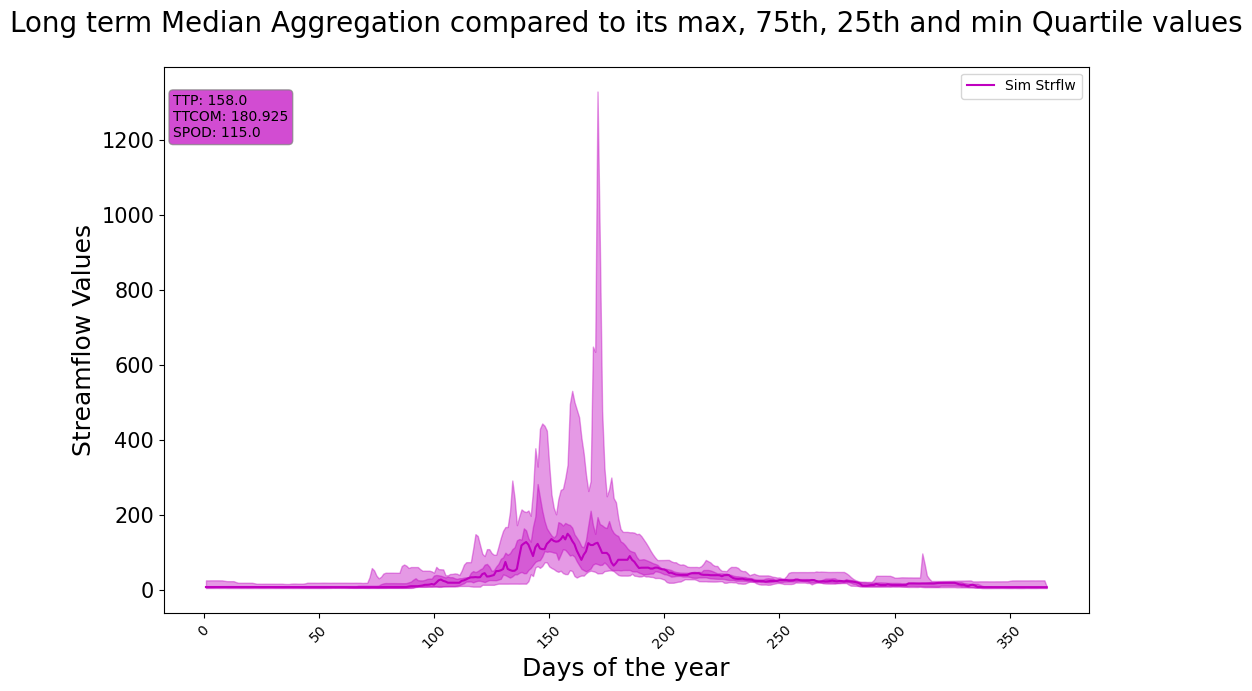

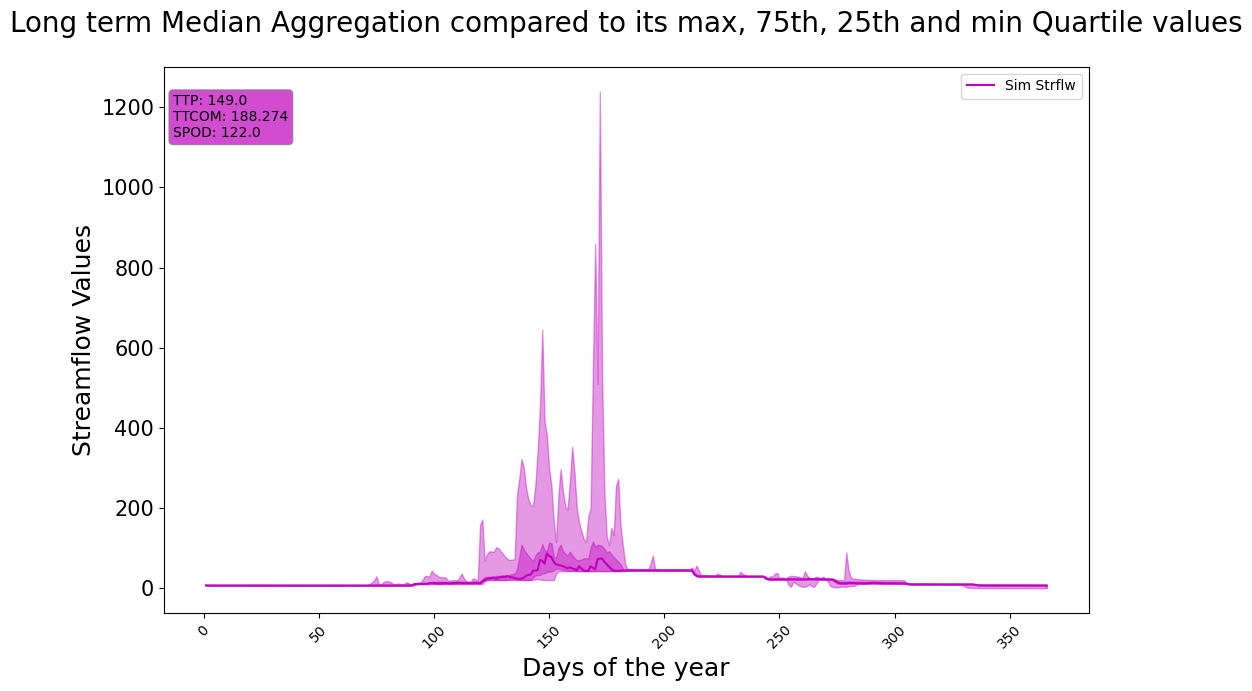

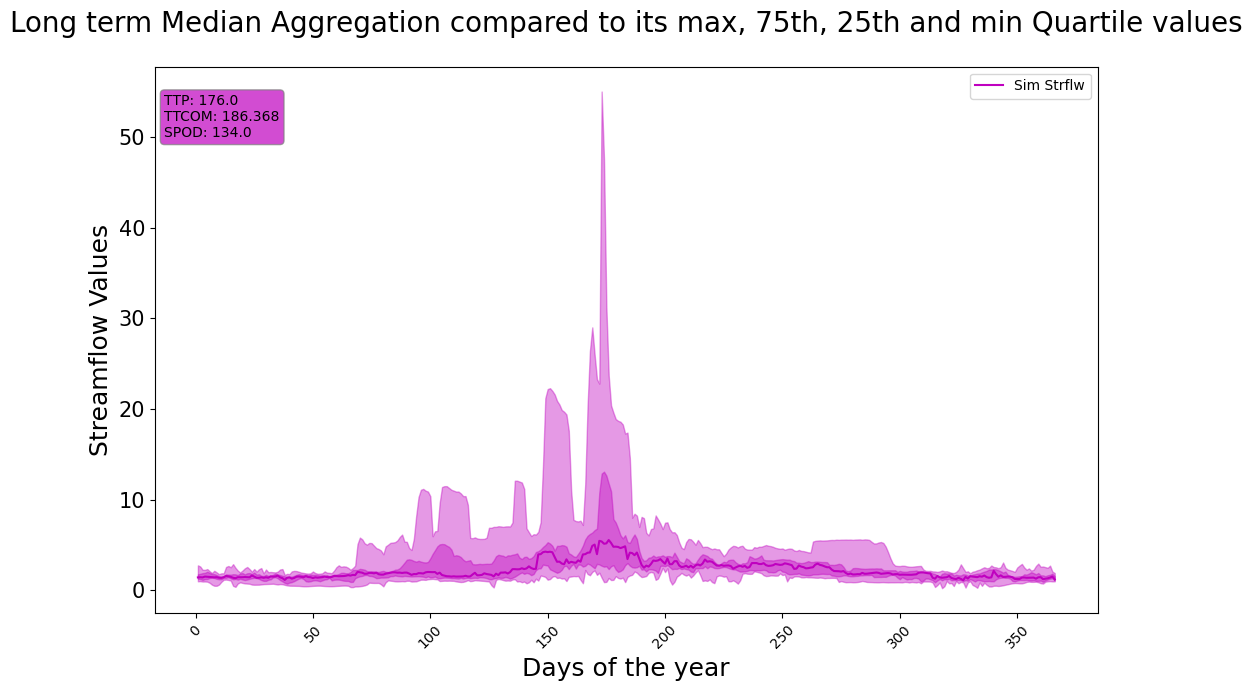

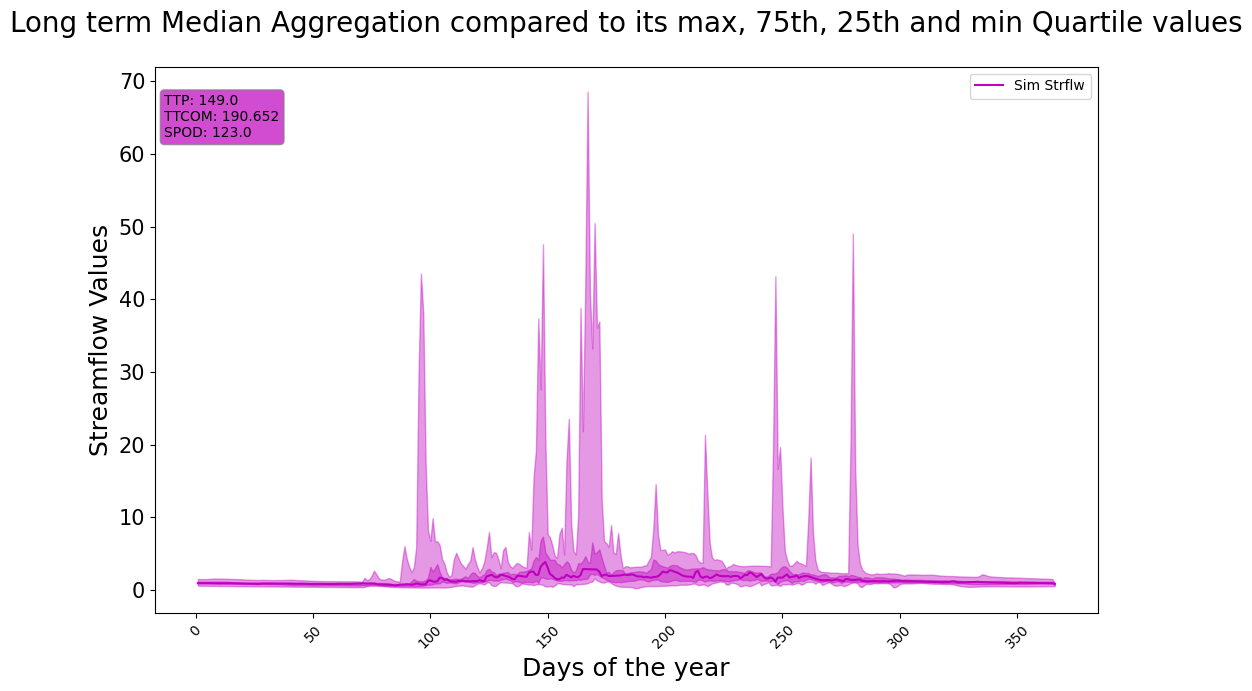

In [32]:
visuals.bounded_plot(
    lines = data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "median").iloc[:, [0,1, 2, 3]],
    upper_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "max").iloc[:, [0,1,2,3]], data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "q75").iloc[:, [0,1,2,3]]],
    lower_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "min").iloc[:, [0,1,2,3]], data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "q25").iloc[:, [0,1,2,3]]],
    legend = ['Sim Strflw','Obs Strflw'],
    linestyles=['m-',],
    labels=['Days of the year', 'Streamflow Values'],
    transparency = [0.4, 0.25],
    metrices=["TTP", "TTCOM", "SPOD"],
    title = 'Long term Median Aggregation compared to its max, 75th, 25th and min Quartile values'
    )

Number of simulated data columns: 1


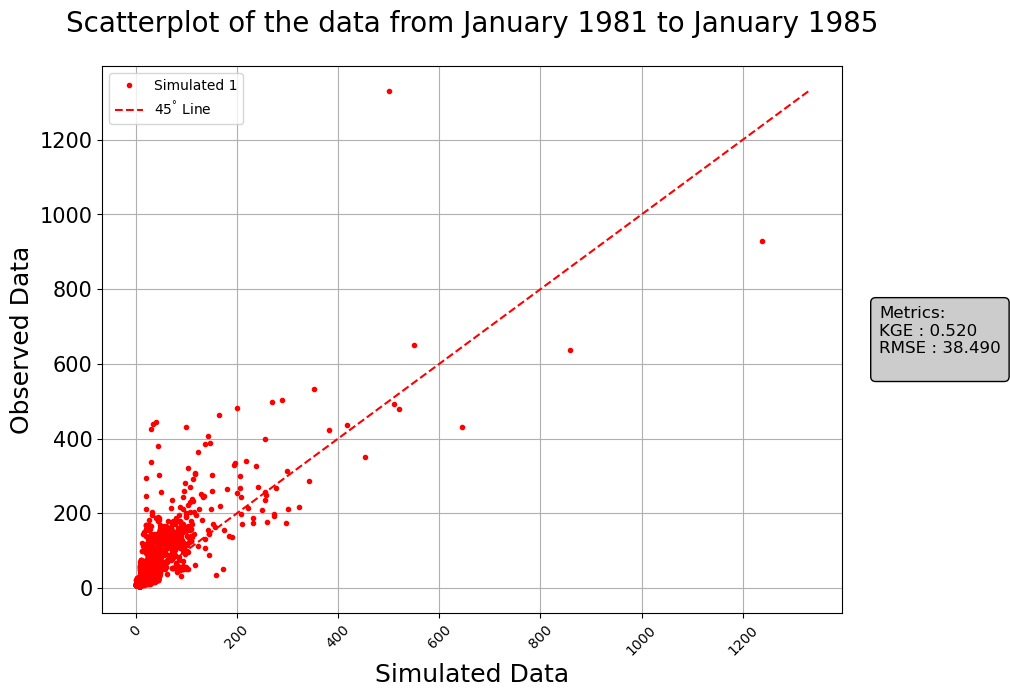

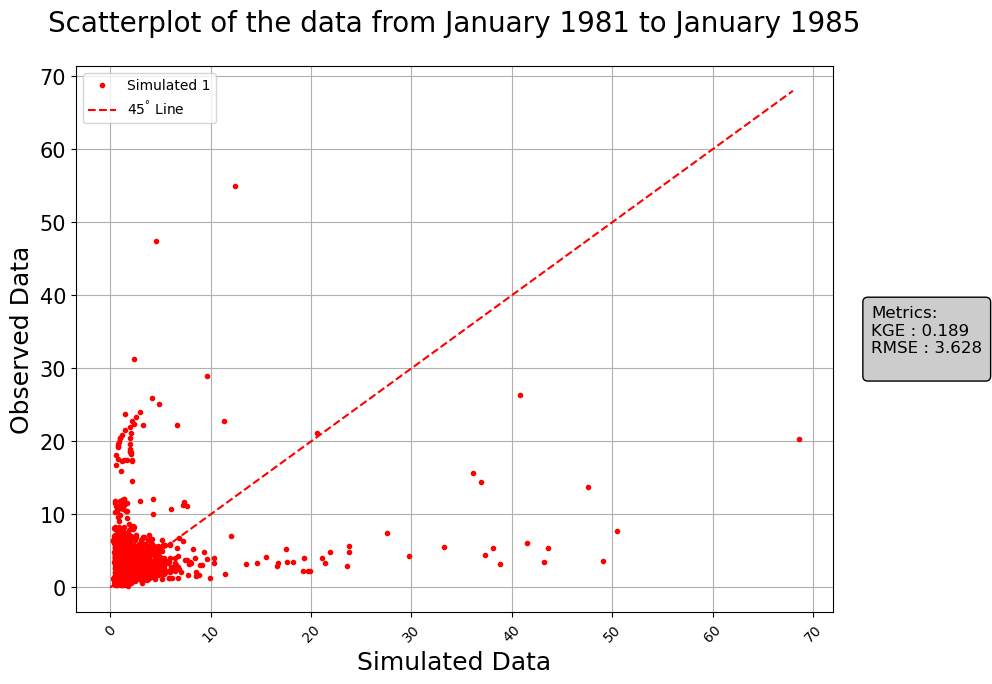

In [34]:
visuals.scatter(merged_df = DATAFRAMES['DF_MERGED'].iloc[:, [0, 1, 2, 3]],
               grid = True,
               labels = ("Simulated Data", "Observed Data"),
               markerstyle = ['r.'],
               title = "Scatterplot of the data from January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
#                save = True,
               )

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


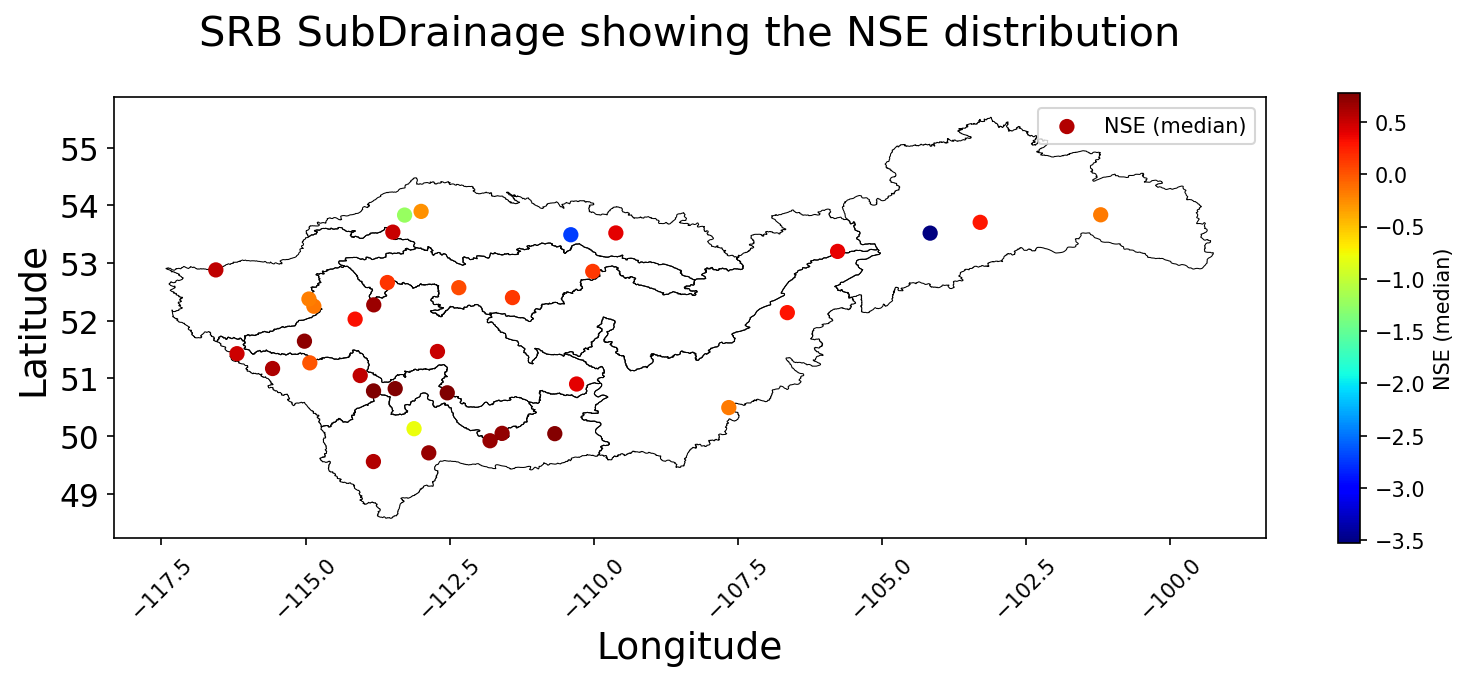

In [35]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "SRB SubDrainage showing the NSE distribution",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "NSE",
    fig_size = (24, 30),
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = DATAFRAMES["DF_SIMULATED"],
    labels=['Longitude', 'Latitude'],
#     mode = "models",
#     models = ["model1"],
#     cmap = 'viridis',
#     vmin = 0,
#     vmax=0.8,
)

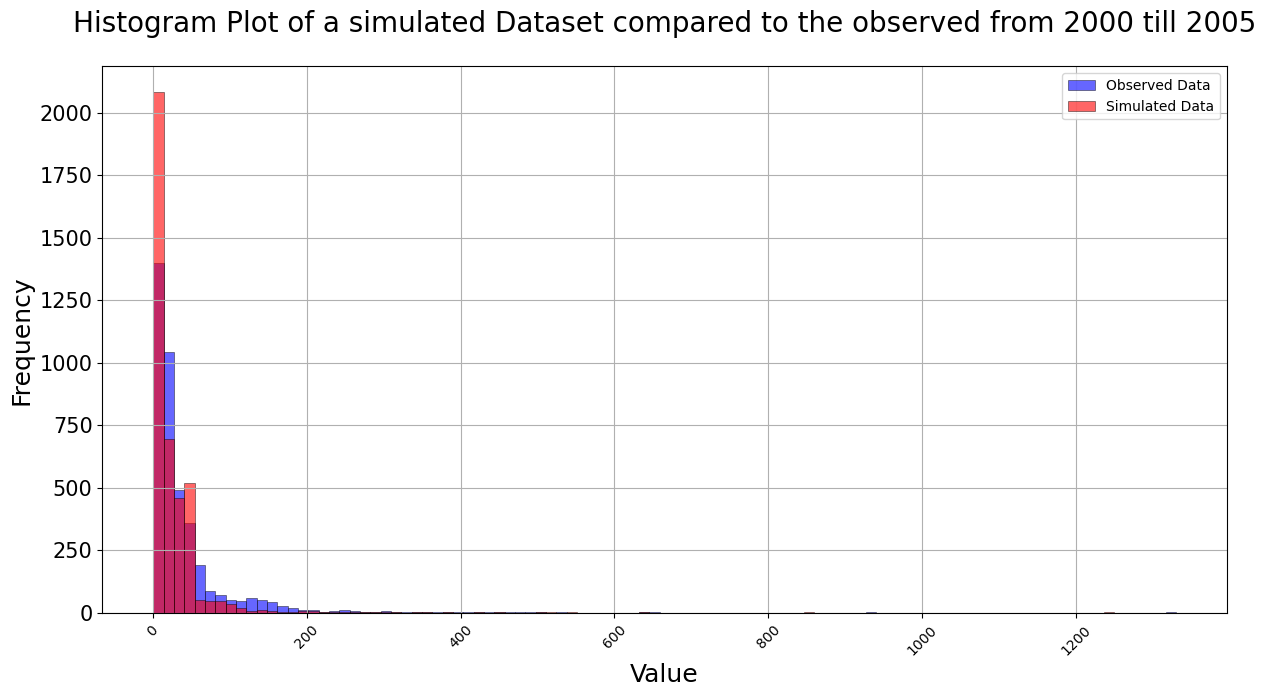

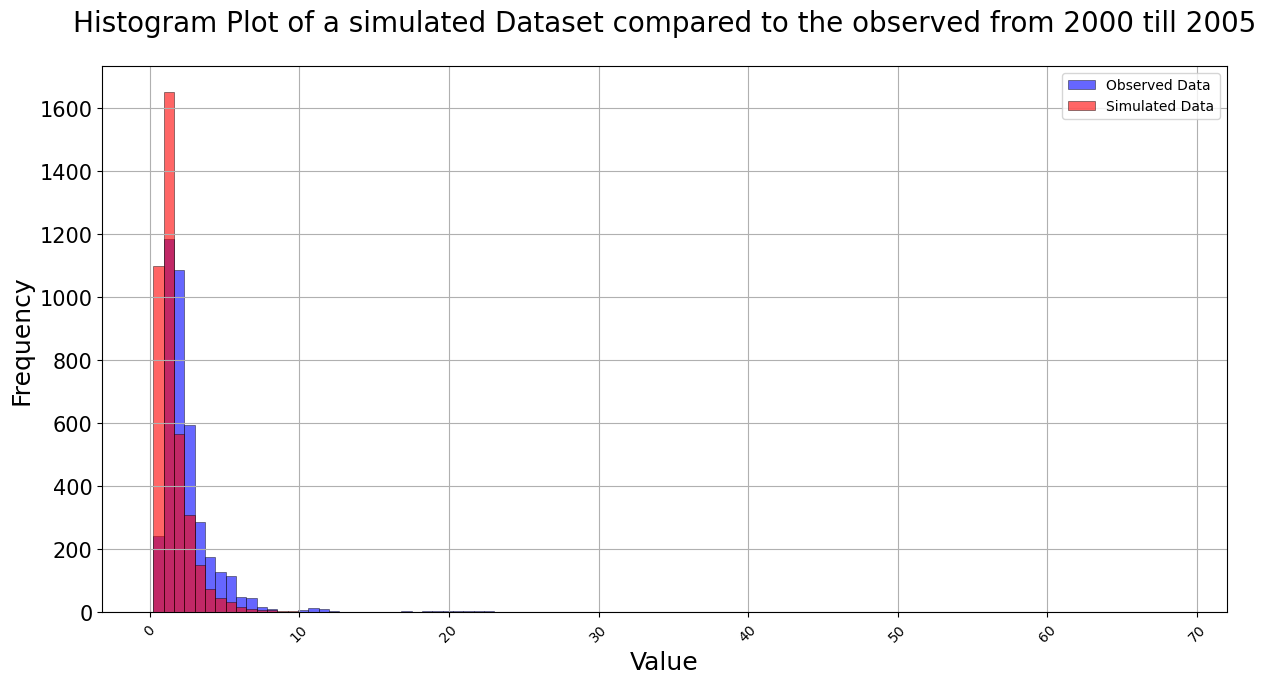

In [38]:
visuals.histogram(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, [0, 1, 2, 3]],
    grid = True,
    title = "Histogram Plot of a simulated Dataset compared to the observed from 2000 till 2005",
)

Number of simulated data columns: 1


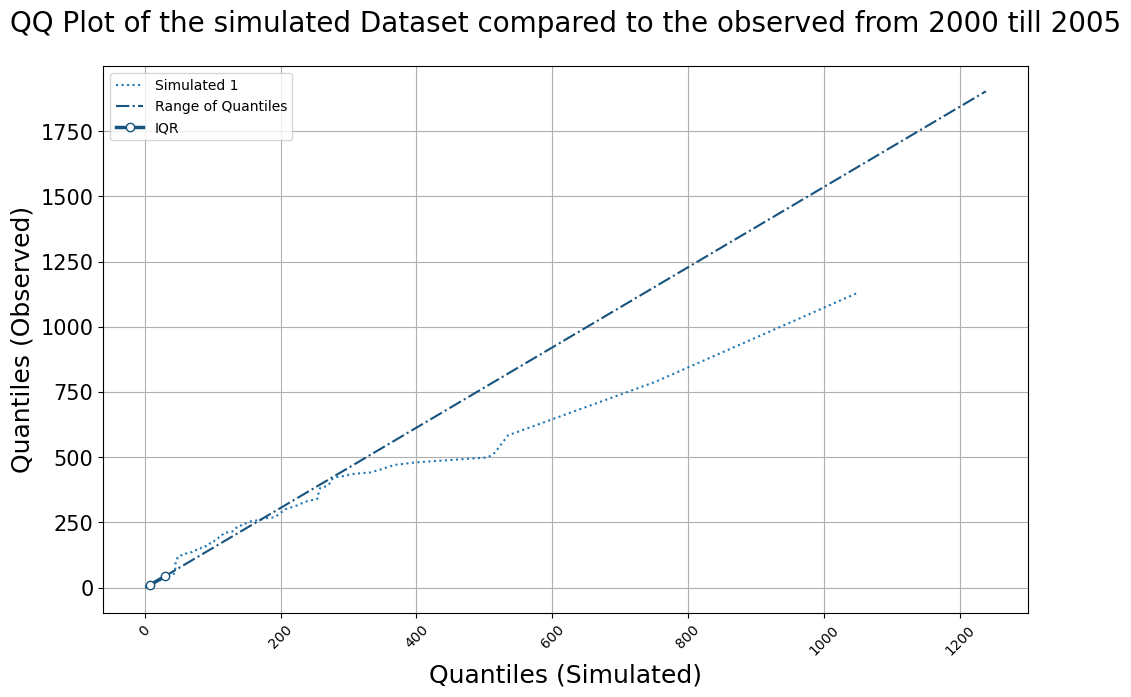

In [40]:
visuals.qqplot(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, [0, 1]],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot of the simulated Dataset compared to the observed from 2000 till 2005",
    grid = True
)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


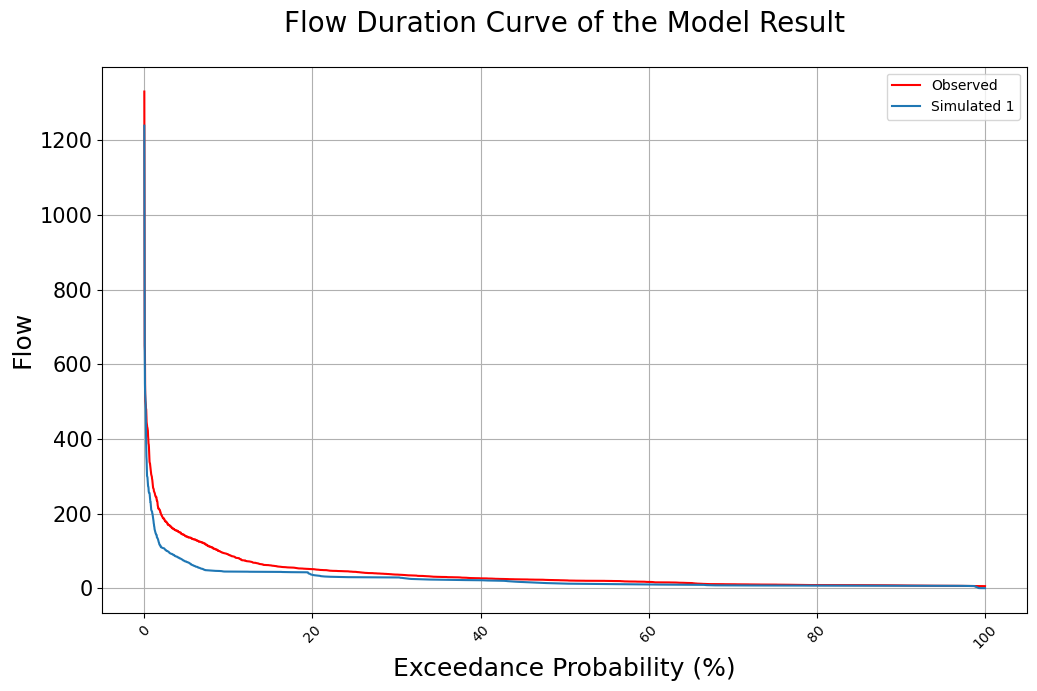

In [41]:
visuals.flow_duration_curve(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, [0, 1]],
    title='Flow Duration Curve of the Model Result',
    grid = True
)

## MULTI model Analysis

In [42]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files, start_date = start_dates)
Stations = pd.read_excel(io=station_input)
Stations = Stations.set_index('Station Number')

The start date for the Data is 2006-01-01


In [43]:
# for key, value in DATAFRAMES.items():
#     print(f"{key}:\n{value.head}")

In [44]:
# Just renaming the column names for comfort

# Get the unique level 1 values (e.g., ['Q50', 'Q90'])
level_1_values = DATAFRAMES["DF_MERGED"].columns.get_level_values(1).unique()

# Repeat the index from other_df to match the column count
new_level_0 = np.repeat(Stations.index, len(level_1_values))

# Rebuild the MultiIndex
DATAFRAMES["DF_MERGED"].columns = pd.MultiIndex.from_arrays([new_level_0, DATAFRAMES["DF_MERGED"].columns.get_level_values(1)])

### DATA MANI

In [45]:
data.daily_aggregate(df=DATAFRAMES["DF_MERGED"])

Station Number 05AA024                                                    \
                QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2006/001         16.20  8.247222  8.220485  8.251542  8.247522  8.247522   
2006/002         16.20  8.263733  8.237323  8.268182  8.264046  8.264046   
2006/003         16.10  8.263645  8.237147  8.268285  8.263968  8.263968   
2006/004         16.10  8.261084  8.234426  8.265919  8.261413  8.261413   
2006/005         16.10  8.257998  8.231168  8.263036  8.258339  8.258339   
...                ...       ...       ...       ...       ...       ...   
2016/362          8.62  0.627293  0.304062  0.655629  0.499930  0.499930   
2016/363          8.64  0.620686  0.302193  0.652242  0.494983  0.494983   
2016/364          8.63  0.613926  0.300855  0.648954  0.490618  0.490618   
2016/365          8.64  0.607379  0.299213  0.645164  0.486467  0.486467   
2016/366          8.61  0.600795  0.297523  0.642502  0.481897  0.481897   

Station Number                                          ...   05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...    QOSIM1   
2006/001        8.265998  8.262267  8.261630  8.237693  ...  449.5709   
2006/002        8.282807  8.279122  8.278222  8.254402  ...  448.0158   
2006/003        8.283238  8.279532  8.278379  8.254301  ...  437.6962   
2006/004        8.281114  8.277385  8.276073  8.251690  ...  387.4730   
2006/005        8.278571  8.274816  8.273252  8.248545  ...  335.2884   
...                  ...       ...       ...       ...  ...       ...   
2016/362        0.810196  0.836024  0.659105  0.355055  ...  373.9724   
2016/363        0.807061  0.832754  0.655689  0.352373  ...  374.1684   
2016/364        0.803974  0.829625  0.652462  0.349859  ...  373.4424   
2016/365        0.800832  0.826486  0.649265  0.347445  ...  372.8567   
2016/366        0.797544  0.822848  0.645609  0.345183  ...  372.0849   

Station Number                                                              \
                  QOSIM2    QOSIM3    QOSIM4    QOSIM5    QOSIM6    QOSIM7   
2006/001        443.3403  458.8904  449.9906  450.0266  468.9960  473.5395   
2006/002        441.5285  457.1690  448.5504  448.5894  467.3150  470.0114   
2006/003        432.7599  445.3347  438.2420  438.2734  454.5476  456.1329   
2006/004        384.3567  390.2301  386.6091  386.6232  396.4259  398.0679   
2006/005        333.4926  336.3000  334.6416  334.6473  341.4606  342.9808   
...                  ...       ...       ...       ...       ...       ...   
2016/362        367.0235  382.5126  373.7741  373.9386  382.0597  385.3524   
2016/363        366.5301  381.3967  373.0242  373.1883  381.9036  385.6631   
2016/364        366.9112  380.3037  373.5500  373.7134  381.3671  385.7978   
2016/365        366.8239  379.8543  373.7472  373.9099  380.3439  385.5450   
2016/366        366.7072  379.1852  373.4416  373.6019  379.1896  383.7966   

Station Number                                
                  QOSIM8    QOSIM9   QOSIM10  
2006/001        459.4513  449.1546  415.0612  
2006/002        457.7242  447.3511  413.6260  
2006/003        445.8600  436.7272  404.7528  
2006/004        390.6907  386.1196  357.1744  
2006/005        336.7613  335.0879  305.0451  
...                  ...       ...       ...  
2016/362        383.1131  374.8456  369.0654  
2016/363        383.5711  375.6281  369.5295  
2016/364        382.9344  374.8571  371.0448  
2016/365        382.7645  374.4327  371.1637  
2016/366        381.8547  374.2664  369.7890  

[4018 rows x 396 columns]

In [46]:
data.weekly_aggregate(df=DATAFRAMES["DF_MERGED"]) # default method of aggregation is mean

Station Number    05AA024                                                    \
                   QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2005-12-26      16.200000  8.247222  8.220485  8.251542  8.247522  8.247522   
2006-01-02      16.100000  8.257350  8.230505  8.262388  8.257689  8.257689   
2006-01-09      16.014286  8.234629  8.206684  8.241057  8.235022  8.235022   
2006-01-16      16.042857  8.209767  8.180844  8.217549  8.210203  8.210203   
2006-01-23      16.042857  8.183715  8.153935  8.192814  8.184190  8.184190   
...                   ...       ...       ...       ...       ...       ...   
2016-11-28      17.257143  1.100056  0.663387  1.011848  0.866998  0.866998   
2016-12-05       8.894286  0.803212  0.369628  0.744000  0.618020  0.618020   
2016-12-12       8.048571  0.720996  0.326869  0.697616  0.561735  0.561735   
2016-12-19       8.665714  0.664036  0.312392  0.672746  0.524273  0.524273   
2016-12-26       8.640000  0.617434  0.301580  0.650614  0.493089  0.493089   

Station Number                                          ...     05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...      QOSIM1   
2005-12-26      8.265998  8.262267  8.261630  8.237693  ...  449.570900   
2006-01-02      8.277930  8.274179  8.272597  8.247882  ...  378.548086   
2006-01-09      8.259056  8.255154  8.251627  8.224757  ...  423.389700   
2006-01-16      8.235757  8.231732  8.228406  8.199540  ...  448.251471   
2006-01-23      8.210612  8.206489  8.203913  8.173198  ...  435.415943   
...                  ...       ...       ...       ...  ...         ...   
2016-11-28      1.207142  1.250802  0.986161  0.784446  ...  422.268900   
2016-12-05      0.891655  0.919712  0.743993  0.436601  ...  379.871829   
2016-12-12      0.847379  0.874833  0.698486  0.386140  ...  375.848200   
2016-12-19      0.825104  0.851515  0.675021  0.365994  ...  379.625571   
2016-12-26      0.805554  0.831217  0.654149  0.351245  ...  373.482800   

Station Number                                                              \
                    QOSIM2      QOSIM3      QOSIM4      QOSIM5      QOSIM6   
2005-12-26      443.340300  458.890400  449.990600  450.026600  468.996000   
2006-01-02      373.673971  384.156400  378.221271  378.243914  392.674700   
2006-01-09      415.476429  431.079029  423.745814  423.785529  441.585643   
2006-01-16      435.995043  455.695214  448.970014  449.028057  465.979771   
2006-01-23      425.366514  443.162157  435.046957  435.102414  454.006557   
...                    ...         ...         ...         ...         ...   
2016-11-28      410.409900  430.917814  421.839957  422.100514  433.200771   
2016-12-05      373.356514  385.307743  379.708643  379.907000  386.378886   
2016-12-12      368.586557  381.812843  375.695543  375.908714  383.575857   
2016-12-19      372.938614  385.149100  379.450386  379.612171  386.201986   
2016-12-26      366.922733  380.842917  373.701483  373.864650  381.147017   

Station Number                                                  
                    QOSIM7      QOSIM8      QOSIM9     QOSIM10  
2005-12-26      473.539500  459.451300  449.154600  415.061200  
2006-01-02      394.740571  384.671014  377.928557  345.588814  
2006-01-09      444.341157  431.645014  423.227643  390.508729  
2006-01-16      469.046714  456.296957  447.462643  418.983057  
2006-01-23      456.972729  443.699586  433.861429  408.049657  
...                    ...         ...         ...         ...  
2016-11-28      438.593186  433.132614  422.887986  399.929729  
2016-12-05      389.300729  387.455157  381.524971  366.293843  
2016-12-12      386.651557  384.050886  377.016514  366.403686  
2016-12-19      388.985714  387.618671  380.255114  373.071429  
2016-12-26      385.093800  382.902017  374.853333  370.030217  

[575 rows x 396 columns]

In [47]:
data.yearly_aggregate(df=DATAFRAMES["DF_MERGED"]) # default method of aggregation is mean

Station Number    05AA024                                              \
                   QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4   
2006-01         16.051613   8.218658   8.190214   8.225838   8.219070   
2006-02         15.846429   7.829784   7.811855   7.836855   7.830096   
2006-03         16.003226   7.610861   7.521759   7.655809   7.612492   
2006-04         31.533333  22.356090  21.275508  23.350474  22.361205   
2006-05         95.264516  88.014962  90.759022  84.046518  84.874805   
...                   ...        ...        ...        ...        ...   
2016-08         24.200000  29.918573  29.918573  29.918573  29.918573   
2016-09         24.160000  15.428026   9.694843  14.077718  14.258548   
2016-10         27.822581   9.665400   9.568480   9.746621   9.641677   
2016-11         28.163333   8.364558   8.149812   8.297580   7.928978   
2016-12          9.148387   0.732572   0.349690   0.711909   0.572905   

Station Number                                                         ...  \
                   QOSIM5     QOSIM6     QOSIM7     QOSIM8     QOSIM9  ...   
2006-01          8.219070   8.243150   8.239192   8.236538   8.208610  ...   
2006-02          7.830096   7.843604   7.841182   7.844187   7.824292  ...   
2006-03          7.612492   7.756349   7.744952   7.680637   7.573566  ...   
2006-04         22.361205  26.060062  25.816918  19.270704  18.459832  ...   
2006-05         84.874805  83.968132  84.285775  90.116223  93.408119  ...   
...                   ...        ...        ...        ...        ...  ...   
2016-08         29.918573  29.921461  29.921461  29.919172  29.919172  ...   
2016-09         14.258548  13.574988  13.243431  18.950277  16.777558  ...   
2016-10          9.641677   9.800188   9.808925   9.749463   9.607021  ...   
2016-11          7.928978   8.582337   8.632331   8.196456   8.431964  ...   
2016-12          0.572905   0.861644   0.888849   0.712700   0.410629  ...   

Station Number      05KJ001                                         \
                     QOSIM1       QOSIM2       QOSIM3       QOSIM4   
2006-01          422.270716   413.638171   429.582529   422.455368   
2006-02          413.940486   406.423364   423.097793   414.709268   
2006-03          371.215161   357.391977   392.283106   372.054435   
2006-04         1710.106977  1669.581010  1698.059350  1689.636777   
2006-05          454.838661   443.114326   460.000813   450.107735   
...                     ...          ...          ...          ...   
2016-08          634.310619   645.187400   587.681735   615.978745   
2016-09          656.907697   617.319970   624.611323   660.326110   
2016-10          738.014806   717.018145   752.227632   745.646716   
2016-11          632.898477   620.144267   640.480813   633.561547   
2016-12          384.004087   376.378574   390.551797   383.937816   

Station Number                                                      \
                     QOSIM5       QOSIM6       QOSIM7       QOSIM8   
2006-01          422.498232   439.686206   442.465300   430.130358   
2006-02          414.772561   434.443771   436.349329   423.477629   
2006-03          372.244955   407.651265   411.086032   392.539010   
2006-04         1708.868973  1732.347380  1738.731470  1697.590080   
2006-05          452.371503   478.750268   483.340726   463.714813   
...                     ...          ...          ...          ...   
2016-08          617.782761   588.268671   580.130587   595.252258   
2016-09          667.393657   624.656093   636.264870   632.686477   
2016-10          747.603677   753.892261   763.214874   756.008968   
2016-11          634.093337   642.801773   648.605337   645.089367   
2016-12          384.137323   391.683332   395.259013   392.764165   

Station Number                            
                     QOSIM9      QOSIM10  
2006-01          421.491377   391.785890  
2006-02          413.666664   391.797746  
2006-03          370.849026   362.200016 

In [48]:
data.monthly_aggregate(df=DATAFRAMES["DF_MERGED"]) # default method of aggregation is mean

Station Number    05AA024                                              \
                   QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4   
2006-01         16.051613   8.218658   8.190214   8.225838   8.219070   
2006-02         15.846429   7.829784   7.811855   7.836855   7.830096   
2006-03         16.003226   7.610861   7.521759   7.655809   7.612492   
2006-04         31.533333  22.356090  21.275508  23.350474  22.361205   
2006-05         95.264516  88.014962  90.759022  84.046518  84.874805   
...                   ...        ...        ...        ...        ...   
2016-08         24.200000  29.918573  29.918573  29.918573  29.918573   
2016-09         24.160000  15.428026   9.694843  14.077718  14.258548   
2016-10         27.822581   9.665400   9.568480   9.746621   9.641677   
2016-11         28.163333   8.364558   8.149812   8.297580   7.928978   
2016-12          9.148387   0.732572   0.349690   0.711909   0.572905   

Station Number                                                         ...  \
                   QOSIM5     QOSIM6     QOSIM7     QOSIM8     QOSIM9  ...   
2006-01          8.219070   8.243150   8.239192   8.236538   8.208610  ...   
2006-02          7.830096   7.843604   7.841182   7.844187   7.824292  ...   
2006-03          7.612492   7.756349   7.744952   7.680637   7.573566  ...   
2006-04         22.361205  26.060062  25.816918  19.270704  18.459832  ...   
2006-05         84.874805  83.968132  84.285775  90.116223  93.408119  ...   
...                   ...        ...        ...        ...        ...  ...   
2016-08         29.918573  29.921461  29.921461  29.919172  29.919172  ...   
2016-09         14.258548  13.574988  13.243431  18.950277  16.777558  ...   
2016-10          9.641677   9.800188   9.808925   9.749463   9.607021  ...   
2016-11          7.928978   8.582337   8.632331   8.196456   8.431964  ...   
2016-12          0.572905   0.861644   0.888849   0.712700   0.410629  ...   

Station Number      05KJ001                                         \
                     QOSIM1       QOSIM2       QOSIM3       QOSIM4   
2006-01          422.270716   413.638171   429.582529   422.455368   
2006-02          413.940486   406.423364   423.097793   414.709268   
2006-03          371.215161   357.391977   392.283106   372.054435   
2006-04         1710.106977  1669.581010  1698.059350  1689.636777   
2006-05          454.838661   443.114326   460.000813   450.107735   
...                     ...          ...          ...          ...   
2016-08          634.310619   645.187400   587.681735   615.978745   
2016-09          656.907697   617.319970   624.611323   660.326110   
2016-10          738.014806   717.018145   752.227632   745.646716   
2016-11          632.898477   620.144267   640.480813   633.561547   
2016-12          384.004087   376.378574   390.551797   383.937816   

Station Number                                                      \
                     QOSIM5       QOSIM6       QOSIM7       QOSIM8   
2006-01          422.498232   439.686206   442.465300   430.130358   
2006-02          414.772561   434.443771   436.349329   423.477629   
2006-03          372.244955   407.651265   411.086032   392.539010   
2006-04         1708.868973  1732.347380  1738.731470  1697.590080   
2006-05          452.371503   478.750268   483.340726   463.714813   
...                     ...          ...          ...          ...   
2016-08          617.782761   588.268671   580.130587   595.252258   
2016-09          667.393657   624.656093   636.264870   632.686477   
2016-10          747.603677   753.892261   763.214874   756.008968   
2016-11          634.093337   642.801773   648.605337   645.089367   
2016-12          384.137323   391.683332   395.259013   392.764165   

Station Number                            
                     QOSIM9      QOSIM10  
2006-01          421.491377   391.785890  
2006-02          413.666664   391.797746  
2006-03          370.849026   362.200016 

In [49]:
data.stat_aggregate(df=DATAFRAMES["DF_MERGED"], method='q25')

05AA024   05AC003    05AD007    05AG006    05AJ001   05BA001  \
                 Q25       Q25        Q25        Q25        Q25       Q25   
2006-01-01  8.240075  0.934339  17.727685  18.806450  62.923018  0.399671   
2006-01-02  8.256735  0.927218  17.194632  18.776633  60.006580  0.395548   
2006-01-03  8.256637  0.922386  16.462238  18.739083  57.979520  0.391097   
2006-01-04  8.254039  0.919630  16.231075  18.667640  56.197555  0.386805   
2006-01-05  8.250908  0.917776  16.196470  18.464358  54.607515  0.382962   
...              ...       ...        ...        ...        ...       ...   
2016-12-27  0.499930  0.317251   6.861887   7.021766  28.577215  0.351430   
2016-12-28  0.494983  0.314959   6.848812   7.005487  27.611335  0.347395   
2016-12-29  0.490618  0.312694   6.836046   6.989656  27.077483  0.343458   
2016-12-30  0.486467  0.310456   6.823507   6.974276  26.706485  0.339605   
2016-12-31  0.481897  0.308241   6.811029   6.959342  26.421135  0.335825   

             05BB001   05BG010    05BH004   05BL024  ...   05FA001   05FC001  \
                 Q25       Q25        Q25       Q25  ...       Q25       Q25   
2006-01-01  2.475697  0.153051  30.755410  0.714929  ...  0.002305  0.027697   
2006-01-02  2.450826  0.151537  31.639480  0.710758  ...  0.002236  0.026929   
2006-01-03  2.425452  0.150119  34.819470  0.705949  ...  0.002171  0.026189   
2006-01-04  2.400754  0.148727  35.253075  0.702073  ...  0.002108  0.025478   
2006-01-05  2.375323  0.147353  35.028720  0.695390  ...  0.002047  0.024793   
...              ...       ...        ...       ...  ...       ...       ...   
2016-12-27  1.948544  0.092593  16.223380  0.138123  ...  0.017074  0.064395   
2016-12-28  1.924831  0.091443  16.044610  0.137032  ...  0.016876  0.062579   
2016-12-29  1.901776  0.090317  15.883385  0.135972  ...  0.016695  0.060817   
2016-12-30  1.875400  0.089196  15.744148  0.134934  ...  0.016528  0.059110   
2016-12-31  1.848632  0.088091  15.615667  0.133882  ...  0.016373  0.057458   

             05FC008   05FE004     05GG001   05HD039     05HG001     05KD003  \
                 Q25       Q25         Q25       Q25         Q25         Q25   
2006-01-01  0.607404  6.530867  124.538000  0.013659  243.548600  277.745700   
2006-01-02  0.605405  6.503342  124.233875  0.013362  245.345425  253.425025   
2006-01-03  0.603446  6.476121  123.934300  0.013082  262.161575  278.872425   
2006-01-04  0.601524  6.449320  123.638650  0.012818  274.172500  311.168625   
2006-01-05  0.599636  6.423061  123.345625  0.012569  274.716975  333.404000   
...              ...       ...         ...       ...         ...         ...   
2016-12-27  0.116601  0.393804  110.357175  0.098759  223.305600  347.470200   
2016-12-28  0.114175  0.391893  110.121950  0.091779  223.386375  347.144275   
2016-12-29  0.111804  0.389882  109.885200  0.085269  223.308500  346.475350   
2016-12-30  0.109484  0.387775  109.652050  0.079207  223.759100  345.646475   
2016-12-31  0.107213  0.385576  109.423750  0.073597  223.913075  343.285175   

             05KE002     05KJ001  
                 Q25         Q25  
2006-01-01  6.080291  449.258675  
2006-01-02  6.043128  447.517275  
2006-01-03  6.003728  436.969450  
2006-01-04  5.961734  386.241975  
2006-01-05  5.921951  334.643025  
...              ...         ...  
2016-12-27  0.802104  373.815225  
2016-12-28  0.799029  373.065225  
2016-12-29  0.795955  373.469300  
2016-12-30  0.792732  373.079325  
2016-12-31  0.789295  372.424075  

[4018 rows x 36 columns]

In [50]:
data.seasonal_period(df=DATAFRAMES["DF_MERGED"], daily_period=('01-01', '01-02'))

Station Number 05AA024                                                    \
                QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2006-01-01       16.20  8.247222  8.220485  8.251542  8.247522  8.247522   
2006-01-02       16.20  8.263733  8.237323  8.268182  8.264046  8.264046   
2007-01-01        9.10  7.555544  7.527942  7.574007  7.562794  7.562794   
2007-01-02        9.20  7.445274  7.394676  7.479002  7.458479  7.458479   
2008-01-01        6.95  7.139231  7.139231  7.139231  7.139231  7.139231   
2008-01-02        6.96  6.811264  6.811264  6.811264  6.811264  6.811264   
2009-01-01        6.39  7.350643  7.350643  7.350643  7.350643  7.350643   
2009-01-02        6.45  7.022185  7.022185  7.022185  7.022185  7.022185   
2010-01-01        8.98  7.507730  7.492271  7.476358  7.493837  7.493837   
2010-01-02        8.99  7.310423  7.282097  7.253150  7.285014  7.285014   
2011-01-01        9.00  7.781963  7.747671  7.787050  7.784691  7.784691   
2011-01-02        8.95  7.723046  7.660535  7.732389  7.728006  7.728006   
2012-01-01        7.90  8.007874  7.963127  8.070479  8.035522  8.035522   
2012-01-02        7.90  8.030042  7.986104  8.091578  8.057133  8.057133   
2013-01-01       10.80  7.495868  7.456795  7.525808  7.501228  7.501228   
2013-01-02       10.80  7.402242  7.330667  7.457079  7.412021  7.412021   
2014-01-01       11.30  7.591574  7.549409  7.595787  7.588389  7.588389   
2014-01-02       11.30  7.601354  7.524182  7.609137  7.595524  7.595524   
2015-01-01       26.80  7.868659  7.798492  7.900675  7.870442  7.870442   
2015-01-02       26.70  7.892879  7.815157  7.924412  7.894608  7.894608   
2016-01-01        8.33  7.180596  7.180596  7.190937  7.180596  7.180596   
2016-01-02        8.35  6.852211  6.852211  6.869358  6.852211  6.852211   

Station Number                                          ...   05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...    QOSIM1   
2006-01-01      8.265998  8.262267  8.261630  8.237693  ...  449.5709   
2006-01-02      8.282807  8.279122  8.278222  8.254402  ...  448.0158   
2007-01-01      7.601793  7.598585  7.587591  7.557102  ...  378.5202   
2007-01-02      7.521327  7.515473  7.503433  7.447614  ...  378.0234   
2008-01-01      7.140190  7.140190  7.139236  7.139236  ...  363.0966   
2008-01-02      6.812212  6.812212  6.811266  6.811266  ...  362.3884   
2009-01-01      7.352144  7.352144  7.350257  7.350257  ...  343.9109   
2009-01-02      7.023661  7.023661  7.021810  7.021810  ...  343.6283   
2010-01-01      7.490326  7.479223  7.535315  7.543779  ...  334.6528   
2010-01-02      7.277176  7.256881  7.360937  7.376270  ...  333.9795   
2011-01-01      7.802839  7.800241  7.806539  7.780775  ...  369.8896   
2011-01-02      7.749477  7.744756  7.766860  7.719835  ...  368.3629   
2012-01-01      8.081874  8.065175  8.145789  8.052339  ...  372.3720   
2012-01-02      8.103206  8.086864  8.165515  8.073707  ...  371.1449   
2013-01-01      7.538496  7.538435  7.547241  7.496382  ...  366.7361   
2013-01-02      7.479000  7.478904  7.495949  7.402817  ...  365.3106   
2014-01-01      7.602088  7.598642  7.598997  7.567089  ...  385.0756   
2014-01-02      7.620697  7.614409  7.615019  7.556549  ...  383.4915   
2015-01-01      7.908392  7.900179  7.926735  7.845359  ...  408.7365   
2015-01-02      7.932134  7.924107  7.950040  7.870039  ...  407.6302   
2016-01-01      7.188089  7.187782  7.207918  7.180636  ...  369.4940   
2016-01-02      6.864206  6.863661  6.900556  6.852252  ...  367.0337   

Station Number                                                              \
                  QOSIM2    QOSIM3    QOSIM4    QOSIM5    QOSIM6    QOSIM7   
2006-01-01      443.3403  458.8904  449.9906  450.0266  468.9960  473.5395   
2006-01-02      441.5285  457.1690  448.5504  448.5894  467.3150  470.0114   
2007-01-01      372.7811  379.0888  379.6378  380.2458  387.4308  388.8447   
2007-01-02      372.3684  379.00

In [51]:
data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"]) # As usual the default aggregation method is mean/average

Station Number    05AA024                                                    \
                   QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
jday                                                                          
1               11.068182  7.611537  7.584242  7.623865  7.614081  7.614081   
2               11.072727  7.486787  7.446946  7.501612  7.489136  7.489136   
3               11.114545  7.462383  7.420389  7.477458  7.464678  7.464678   
4               11.160909  7.455064  7.412642  7.470017  7.457333  7.457333   
5               11.213636  7.450698  7.408138  7.465469  7.452946  7.452946   
...                   ...       ...       ...       ...       ...       ...   
362             10.327273  7.075416  7.035249  7.086695  7.066596  7.066596   
363             10.329091  7.072837  7.033407  7.084431  7.064161  7.064161   
364             10.346364  7.070253  7.031624  7.082186  7.061789  7.061789   
365             10.348182  7.067706  7.029829  7.079909  7.059452  7.059452   
366              8.576667  5.317993  5.216903  5.331896  5.278361  5.278361   

Station Number                                          ...     05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...      QOSIM1   
jday                                                    ...               
1               7.633839  7.629351  7.646113  7.613695  ...  376.550473   
2               7.515082  7.509095  7.533601  7.489687  ...  375.364473   
3               7.491608  7.485379  7.511129  7.465396  ...  369.448927   
4               7.484364  7.478106  7.504006  7.458075  ...  335.135218   
5               7.479942  7.473691  7.499543  7.453685  ...  293.037391   
...                  ...       ...       ...       ...  ...         ...   
362             7.105285  7.105290  7.096566  7.052806  ...  369.634427   
363             7.103037  7.103039  7.094307  7.050582  ...  370.798418   
364             7.100807  7.100813  7.092073  7.048380  ...  371.000282   
365             7.098590  7.098603  7.089859  7.046208  ...  370.493945   
366             5.384654  5.393089  5.332949  5.232807  ...  361.534700   

Station Number                                                              \
                    QOSIM2      QOSIM3      QOSIM4      QOSIM5      QOSIM6   
jday                                                                         
1               369.117509  385.450218  377.953855  379.565082  388.936445   
2               367.831645  384.061418  376.764118  378.282382  387.199773   
3               362.464809  377.242455  370.433609  371.738555  380.151082   
4               331.065300  339.648564  335.491691  336.213618  341.619973   
5               291.502236  294.889764  293.169118  293.418209  296.159964   
...                    ...         ...         ...         ...         ...   
362             362.524918  378.881791  371.420036  372.550273  381.750636   
363             362.860055  379.824609  371.915436  373.324636  382.588818   
364             363.035291  379.922091  372.166873  373.754591  382.536400   
365             362.819355  379.392164  371.790536  373.451009  382.256136   
366             354.512167  377.839667  364.926767  365.956633  379.617100   

Station Number                                                  
                    QOSIM7      QOSIM8      QOSIM9     QOSIM10  
jday                                                            
1               392.561709  387.595927  375.752027  380.234755  
2               390.733036  386.194591  374.337109  378.895582  
3               383.207791  379.221073  368.349209  372.198691  
4               343.423836  341.014655  334.672218  334.590255  
5               297.082591  295.852136  293.512400  289.180755  
...                    ...         ...         ...         ...  
362             387.716136  381.078200  368.481991  375.406100  
363             387.710245  382.215564  369.612145  376.655645  
364             387.371845  382.34

In [52]:
data.stat_aggregate(df=data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = 'median'), method='median')

05AA024   05AC003    05AD007    05AG006    05AJ001   05BA001   05BB001  \
        MEDIAN    MEDIAN     MEDIAN     MEDIAN     MEDIAN    MEDIAN    MEDIAN   
jday                                                                            
1     7.568401  0.944037  15.010300  15.716750  51.096410  0.752164  2.760761   
2     7.468741  0.943100  14.721940  15.691985  50.778250  0.743921  2.729280   
3     7.447839  0.943007  14.262265  15.667285  50.548925  0.735751  2.698230   
4     7.439920  0.943572  14.040535  15.631030  50.339095  0.727721  2.667667   
5     7.434158  0.941640  13.986880  15.535775  50.093665  0.719815  2.637548   
...        ...       ...        ...        ...        ...       ...       ...   
362   7.692705  0.903291  14.608400  14.948290  50.031675  0.790932  2.883807   
363   7.690532  0.893554  14.593665  14.930400  49.645810  0.781792  2.853402   
364   7.688407  0.887458  14.579030  14.913155  49.256880  0.772803  2.823188   
365   7.686322  0.887165  14.564465  14.896615  48.893950  0.763959  2.792281   
366   7.605867  0.850170  14.465180  14.722085  43.797930  0.786276  2.963672   

       05BG010    05BH004   05BL024  ...   05FA001   05FC001   05FC008  \
        MEDIAN     MEDIAN    MEDIAN  ...    MEDIAN    MEDIAN    MEDIAN   
jday                                 ...                                 
1     0.211045  30.919605  0.987080  ...  0.004772  0.050001  0.256011   
2     0.208595  33.767980  0.980650  ...  0.004566  0.048351  0.253429   
3     0.206016  36.725320  0.973985  ...  0.004372  0.046769  0.250906   
4     0.203456  36.015900  0.968344  ...  0.004189  0.045253  0.248440   
5     0.200884  35.674110  0.959429  ...  0.004017  0.043800  0.246027   
...        ...        ...       ...  ...       ...       ...       ...   
362   0.205365  31.186695  0.586171  ...  0.017074  0.062028  0.227132   
363   0.203104  30.642560  0.575546  ...  0.016876  0.061076  0.222590   
364   0.200898  30.377135  0.566770  ...  0.016695  0.060177  0.218230   
365   0.198735  30.220255  0.559910  ...  0.016528  0.059110  0.214041   
366   0.181193  19.877860  1.199947  ...  0.016373  0.057459  0.210016   

       05FE004    05GG001   05HD039    05HG001    05KD003   05KE002    05KJ001  
        MEDIAN     MEDIAN    MEDIAN     MEDIAN     MEDIAN    MEDIAN     MEDIAN  
jday                                                                            
1     0.742569  113.51325  0.013681  227.98205  273.89810  0.628797  373.41200  
2     0.741411  113.25955  0.013577  228.58135  253.37995  0.625451  371.83075  
3     0.740163  113.00865  0.013478  236.40135  255.65465  0.622218  365.79665  
4     0.738814  112.76120  0.013386  243.58615  277.26985  0.619057  331.52985  
5     0.737353  112.53835  0.013232  244.35080  300.42070  0.615910  289.71970  
...        ...        ...       ...        ...        ...       ...        ...  
362   0.718837  114.09150  0.014507  228.65720  361.47805  0.642829  371.62580  
363   0.711617  113.83150  0.014212  228.15200  361.44290  0.639264  373.02415  
364   0.704631  113.57200  0.013959  227.34585  358.79540  0.635741  373.20685  
365   0.697869  113.31420  0.013795  226.67670  359.39980  0.632243  373.91315  
366   0.985485  111.49260  0.021806  225.83480  346.52940  0.526121  373.52175  

[366 rows x 36 columns]

In [53]:
# DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files[2], start_date = start_dates,
#                                       daily_agg = True, da_method = 'min',
#                                       weekly_agg = True, wa_method = 'min',
#                                       monthly_agg = True, ma_method = 'inst', 
#                                       yearly_agg = True, ya_method = 'sum',
#                                       stat_agg = True, stat_method = 'q75',
#                                       seasonal_p = True, sp_dperiod = ('05-01', '08-30'), sp_subset = ('1981-01-01', '1985-12-31'),
#                                       long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
#                                      )


# for key, value in DATAFRAMES.items():
#     print(f"{key}:\n{value}")

## Metrics in progress

In [79]:
# Mean square error for the data we were given
print(metrics.rmse(observed=DATAFRAMES['DF_OBSERVED'], simulated=[DATAFRAMES[f"DF_SIMULATED_{i+1}"] for i in range(10)]))

             model1   model2   model3   model4   model5   model6   model7  \
Station 1    37.930   37.990   38.490   38.150   38.150   38.400   38.440   
Station 2     3.640    3.666    3.628    3.641    3.641    3.626    3.650   
Station 3    73.610   74.070   74.220   73.510   73.550   74.530   74.910   
Station 4    73.420   73.390   74.050   73.300   73.400   74.310   74.490   
Station 5   118.300  124.400  118.400  118.000  118.200  118.500  118.900   
Station 6     9.066   12.090    8.221    8.567    8.162    8.294    8.990   
Station 7    23.740   27.520   26.370   21.920   21.320   26.950   28.440   
Station 8     8.842    9.403    8.293    8.646    8.646    8.275    8.277   
Station 9    47.440   53.250   48.550   44.090   43.680   49.000   50.810   
Station 10   24.000   24.040   24.930   23.860   23.860   24.970   25.360   
Station 11   74.790   86.320   73.540   67.980   67.730   74.330   77.570   
Station 12   75.850   86.670   74.480   68.830   68.740   75.140   77.980   

In [80]:
# Root Mean square error for the data we were given
print(metrics.nse(observed=DATAFRAMES['DF_OBSERVED'], simulated=[DATAFRAMES[f"DF_SIMULATED_{i+1}"] for i in range(10)]))

             model1   model2    model3   model4   model5    model6    model7  \
Station 1   0.59520  0.59400  0.583300  0.59050  0.59050  0.585200  0.584200   
Station 2  -0.79650 -0.82250 -0.784500 -0.79740 -0.79740 -0.782400 -0.806900   
Station 3   0.69430  0.69050  0.689300  0.69520  0.69480  0.686700  0.683500   
Station 4   0.69300  0.69330  0.687800  0.69410  0.69320  0.685500  0.684100   
Station 5   0.74930  0.72260  0.749000  0.75070  0.74980  0.748300  0.746800   
Station 6   0.37980 -0.10270  0.490100  0.44630  0.49740  0.481000  0.390100   
Station 7   0.67910  0.56890  0.604000  0.72650  0.74110  0.586500  0.539500   
Station 8  -0.13760 -0.28650 -0.000706 -0.08779 -0.08779  0.003621  0.003007   
Station 9   0.55340  0.43720  0.532300  0.61420  0.62140  0.523500  0.487500   
Station 10  0.79550  0.79490  0.779300  0.79800  0.79800  0.778600  0.771800   
Station 11  0.75560  0.67440  0.763700  0.79800  0.79950  0.758600  0.737100   
Station 12  0.75600  0.68150  0.764800  

In [81]:
# Mean Average error for the data we were given
print(metrics.kge(observed=DATAFRAMES['DF_OBSERVED'], simulated=[DATAFRAMES[f"DF_SIMULATED_{i+1}"] for i in range(10)]))

             model1   model2  model3  model4  model5  model6  model7  model8  \
Station 1   0.53420  0.53730  0.5204  0.5282  0.5282  0.5230  0.5216  0.5422   
Station 2   0.18560  0.17380  0.1888  0.1853  0.1853  0.1894  0.1870  0.1886   
Station 3   0.78620  0.79640  0.7645  0.7824  0.7834  0.7633  0.7615  0.7875   
Station 4   0.80250  0.81320  0.7871  0.8015  0.8008  0.7853  0.7840  0.7976   
Station 5   0.85260  0.83150  0.7934  0.8355  0.8379  0.7917  0.7886  0.8108   
Station 6   0.60790  0.41500  0.6496  0.6644  0.6843  0.6434  0.6088  0.6683   
Station 7   0.63330  0.60550  0.4837  0.5959  0.6111  0.4738  0.4576  0.5045   
Station 8   0.43090  0.34830  0.4798  0.4444  0.4444  0.4816  0.4813  0.4758   
Station 9   0.64950  0.58340  0.5604  0.6497  0.6563  0.5525  0.5372  0.5794   
Station 10  0.65130  0.66380  0.6156  0.6369  0.6369  0.6158  0.6138  0.6212   
Station 11  0.81010  0.73290  0.7653  0.8325  0.8380  0.7585  0.7453  0.7768   
Station 12  0.84650  0.77550  0.7632  0.

In [82]:
# Nash-Sutcliffe Efficiency for the data we were given
print(metrics.lognse(observed=DATAFRAMES['DF_OBSERVED'], simulated=[DATAFRAMES[f"DF_SIMULATED_{i+1}"] for i in range(10)]))

               model1     model2     model3    model4    model5    model6  \
Station 1    0.541800   0.389700   0.542600   0.52640   0.52640   0.55600   
Station 2   -1.131000  -1.906000  -0.741000  -1.14900  -1.14900  -0.69850   
Station 3    0.395200   0.360600   0.402000   0.39190   0.39090   0.40540   
Station 4    0.279100   0.243200   0.290600   0.27480   0.27410   0.29590   
Station 5   -0.066060  -0.285600   0.142000  -0.06340  -0.06149   0.18470   
Station 6   -1.056000  -2.654000   0.009106  -0.92270  -0.85620   0.04401   
Station 7   -1.674000  -3.039000   0.117400  -1.56700  -1.54500   0.25600   
Station 8  -22.020000 -31.380000 -10.930000 -21.59000 -21.59000  -9.86300   
Station 9   -1.863000  -3.059000  -0.868700  -1.58100  -1.51800  -0.72840   
Station 10  -1.037000  -1.663000  -0.431700  -0.97630  -0.97630  -0.31610   
Station 11  -0.257400  -0.800700   0.060580  -0.13140  -0.10310   0.09624   
Station 12   0.000475  -0.537300   0.264100   0.08654   0.09934   0.29500   

In [22]:
# metrices = ["RMSE", "KGE", "NSE", "LogNSE", "TTP_OBS", "TTP_SIM",  "TTCOM_OBS", "TTCOM_SIM",  "SPOD_OBS", "SPOD_SIM"]
# metrics.calculate_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED'],
#                                             metrices=metrices)

In [23]:
# metrics.calculate_all_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED'],
# #                          format='txt', out='metrics'
#                          )

# Visuals

Number of simulated data columns: 9
Number of linewidths provided is less than the number of columns. Number of columns : 10. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 10. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 10. Number of legends provided is:  1. Applying Default legend names


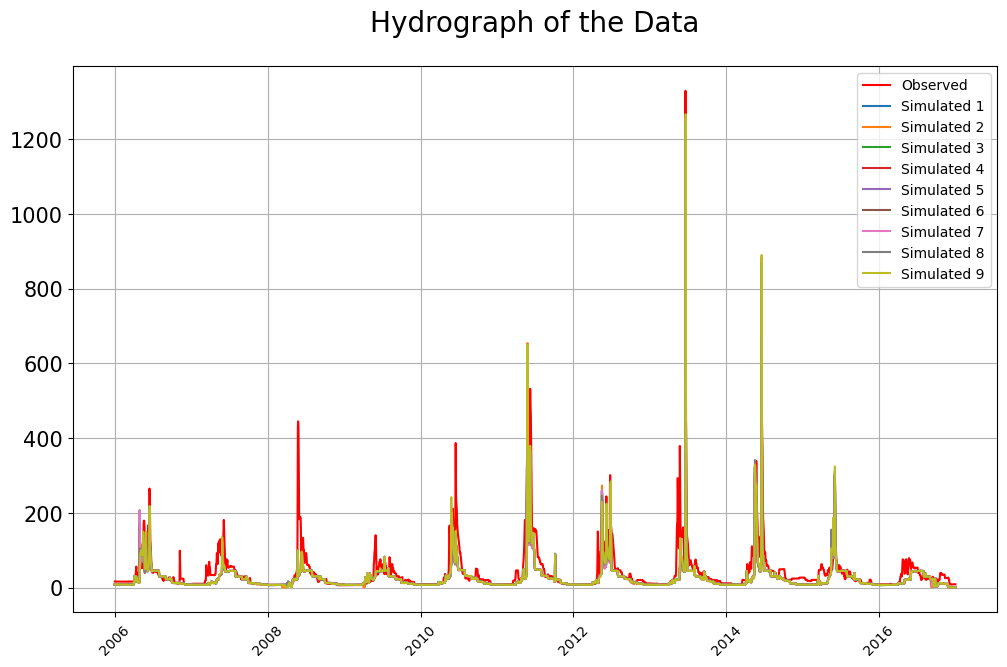

In [56]:
# Plotting both Observed and Simulated combined
visuals.plot(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, 0:10],
    title='Hydrograph of the Data',
    grid=True,
)

Number of simulated data columns: 10
Number of linewidths provided is less than the number of columns. Number of columns : 11. Number of linewidths provided is:  2. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 11. Number of linestyles provided is:  2. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 11. Number of legends provided is:  1. Applying Default legend names


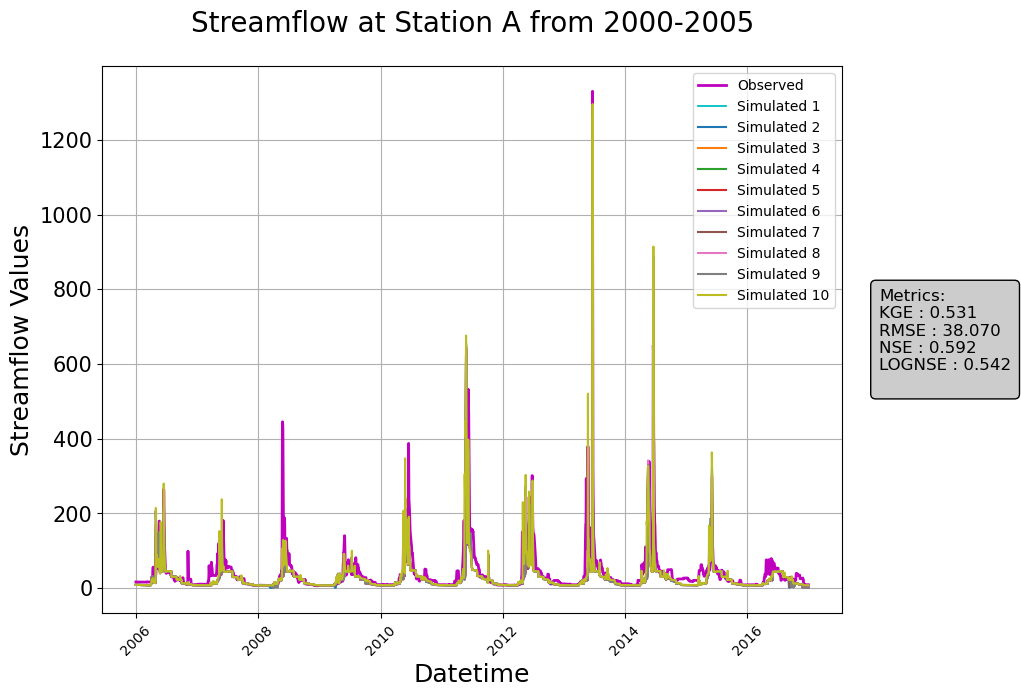

In [72]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, 0:11],
    # including multiple plot titles
    title=['Streamflow at Station A from 2000-2005', 'Streamflow at Station C from 2000-2005'],
    fig_size=(10, 6),
    linestyles=('m-', 'c-'),
    labels=['Datetime', 'Streamflow Values'],
    linewidth=(2, 1.3),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE', 'LOGNSE'],
    grid=True,
    )

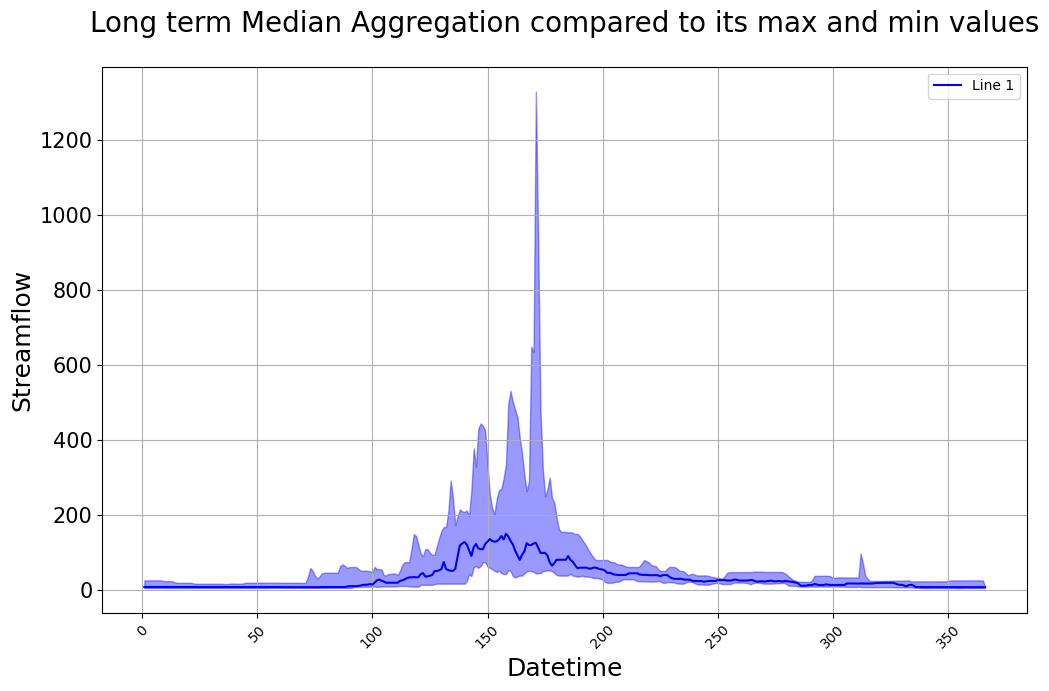

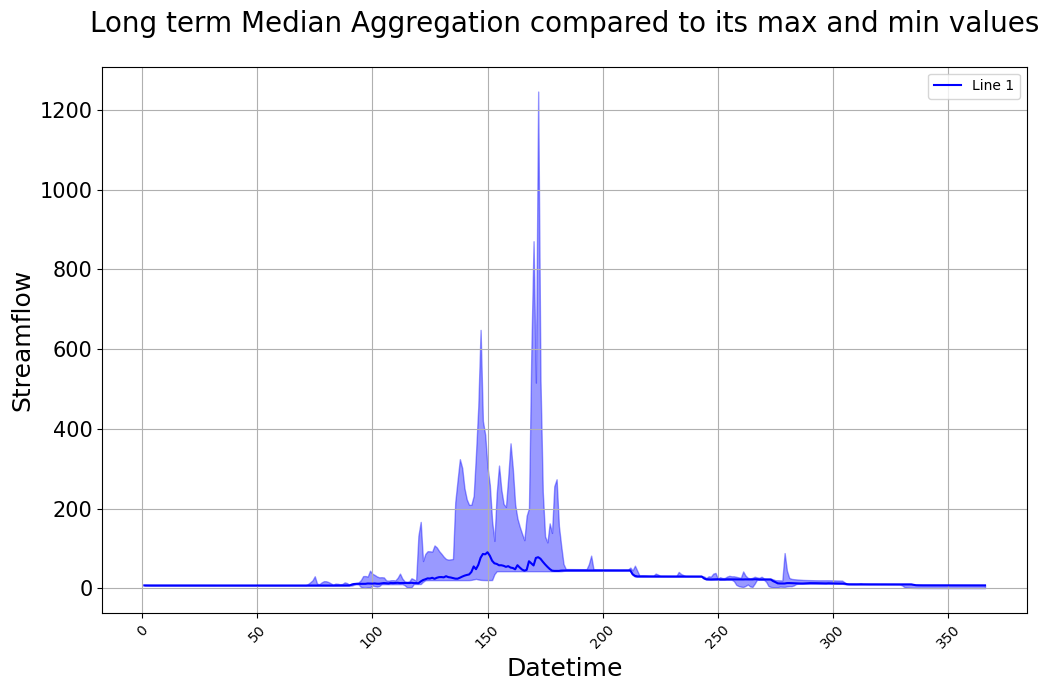

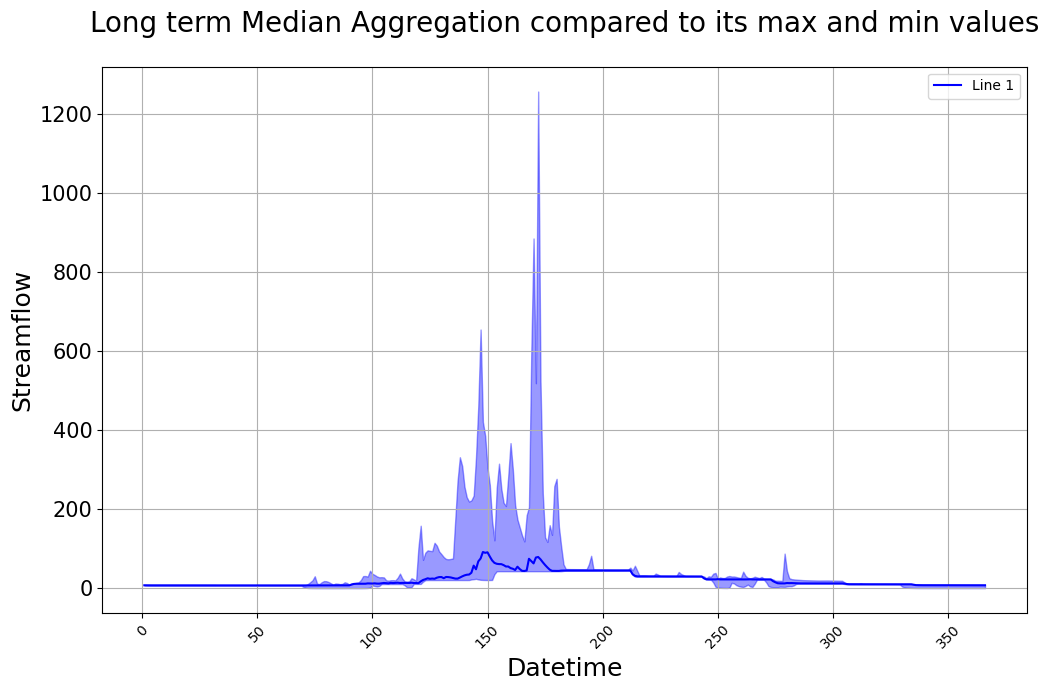

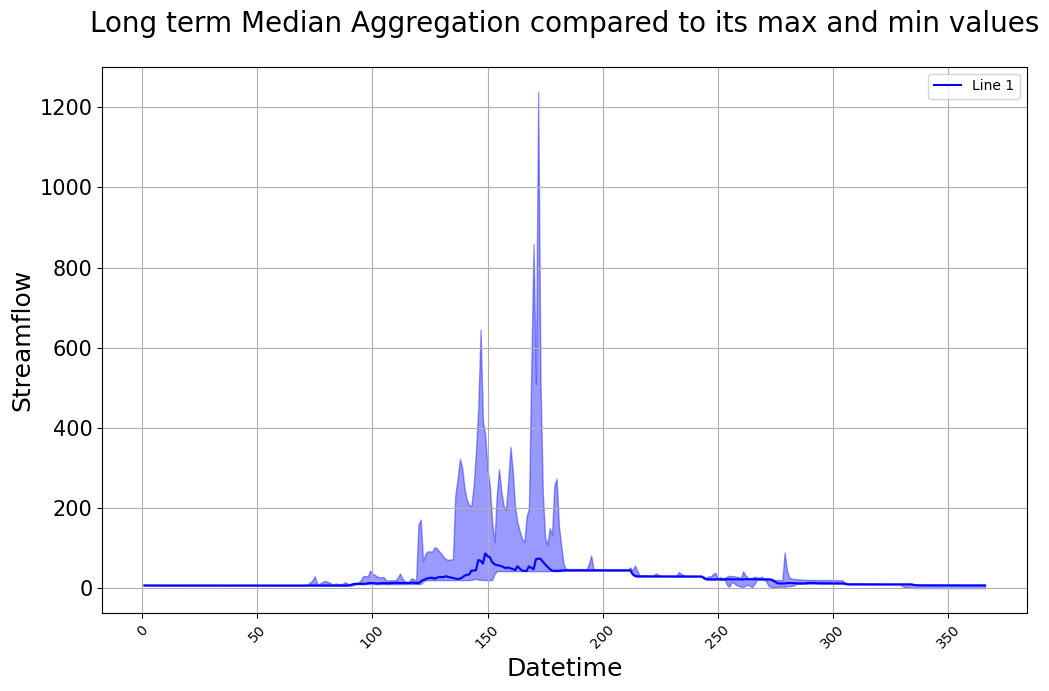

In [73]:
visuals.bounded_plot(
    lines = data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "median").iloc[:, [0,1, 2, 3]],
    upper_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "max").iloc[:, [0,1,2,3]]],
    lower_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "min").iloc[:, [0,1,2,3]]],
    linestyles=['b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = 'Long term Median Aggregation compared to its max and min values'
    )

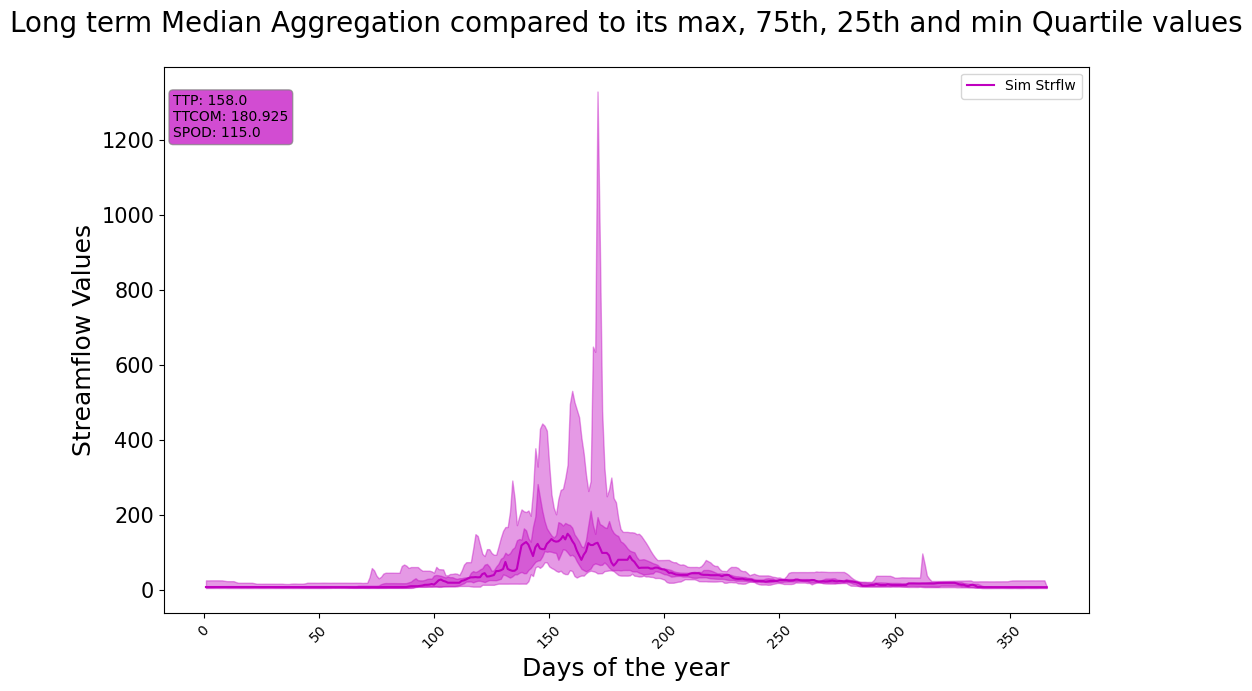

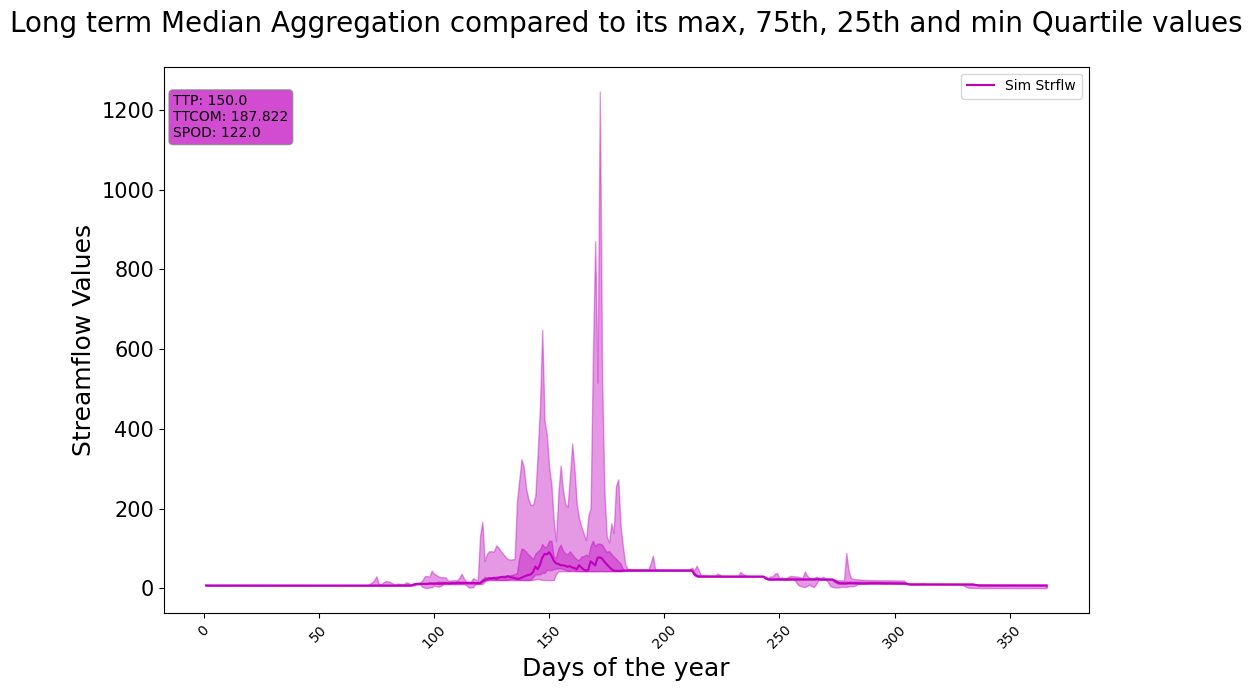

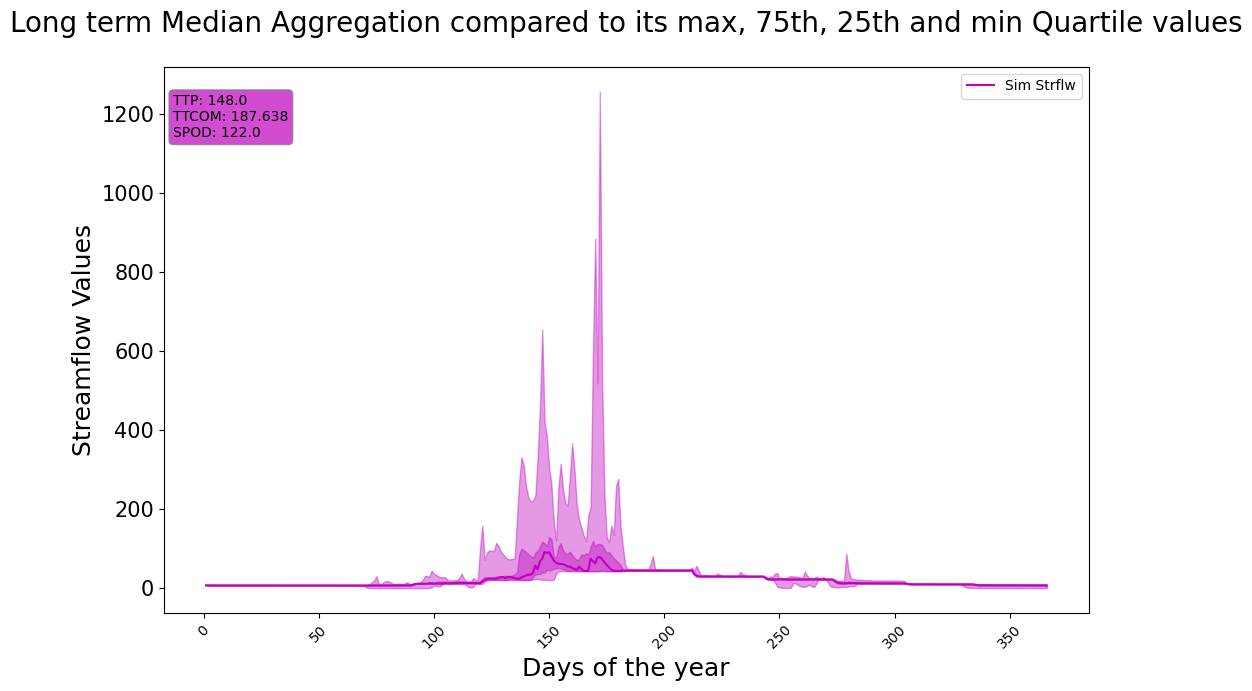

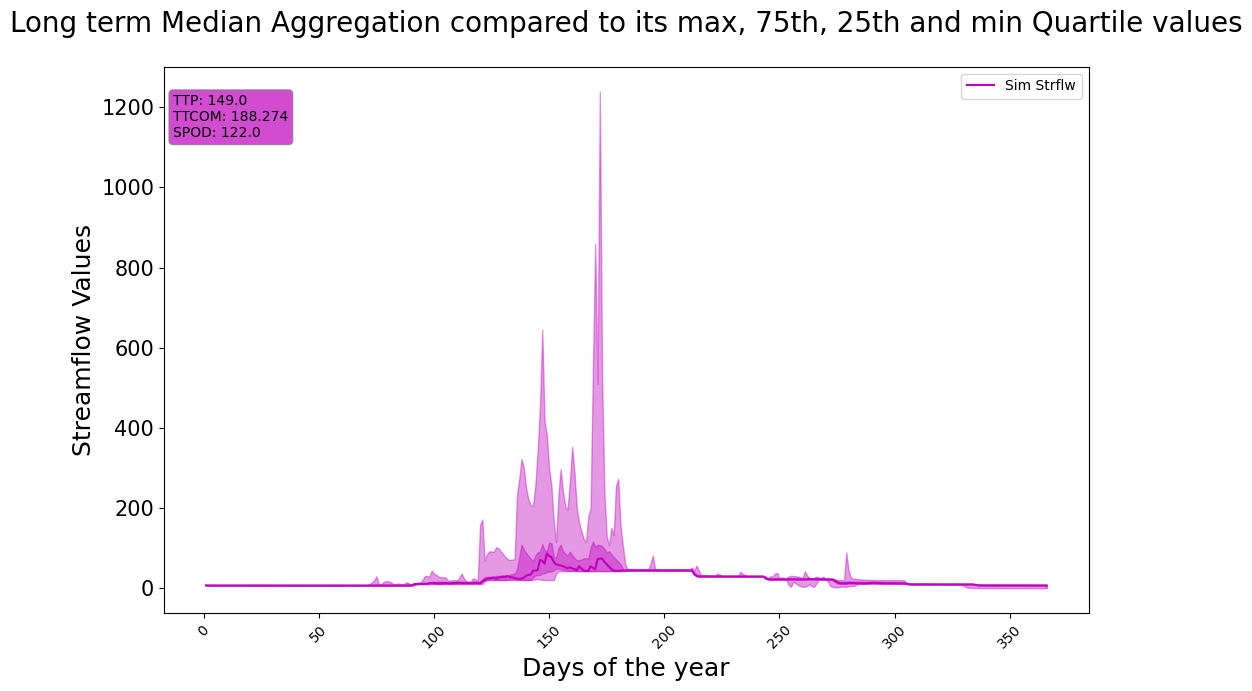

In [74]:
visuals.bounded_plot(
    lines = data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "median").iloc[:, [0,1, 2, 3]],
    upper_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "max").iloc[:, [0,1,2,3]], data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "q75").iloc[:, [0,1,2,3]]],
    lower_bounds = [data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "min").iloc[:, [0,1,2,3]], data.long_term_seasonal(df=DATAFRAMES["DF_MERGED"], method = "q25").iloc[:, [0,1,2,3]]],
    legend = ['Sim Strflw','Obs Strflw'],
    linestyles=['m-',],
    labels=['Days of the year', 'Streamflow Values'],
    transparency = [0.4, 0.25],
    metrices=["TTP", "TTCOM", "SPOD"],
    title = 'Long term Median Aggregation compared to its max, 75th, 25th and min Quartile values'
    )

Number of simulated data columns: 10
Number of markerstyles provided is less than the number of columns. Number of columns : 10. Number of markerstyles provided is:  1. Using Default Markerstyles.


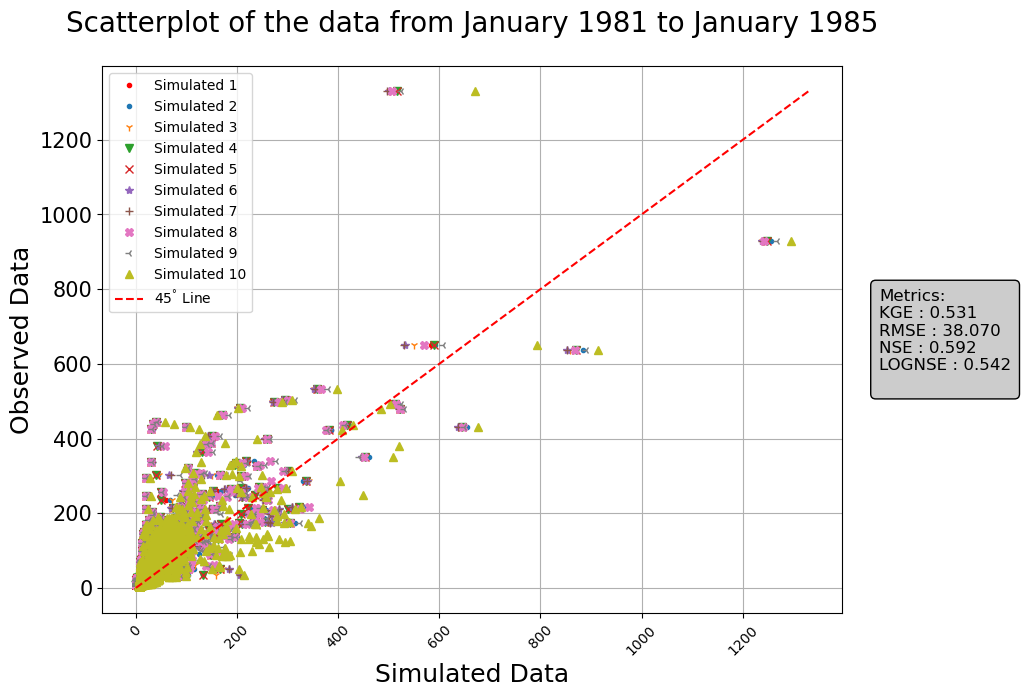

In [75]:
visuals.scatter(merged_df = DATAFRAMES['DF_MERGED'].iloc[:, :11],
               grid = True,
               labels = ("Simulated Data", "Observed Data"),
               markerstyle = ['r.'],
               title = "Scatterplot of the data from January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE', 'NSE', 'LOGNSE'],
#                save = True,
               )

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


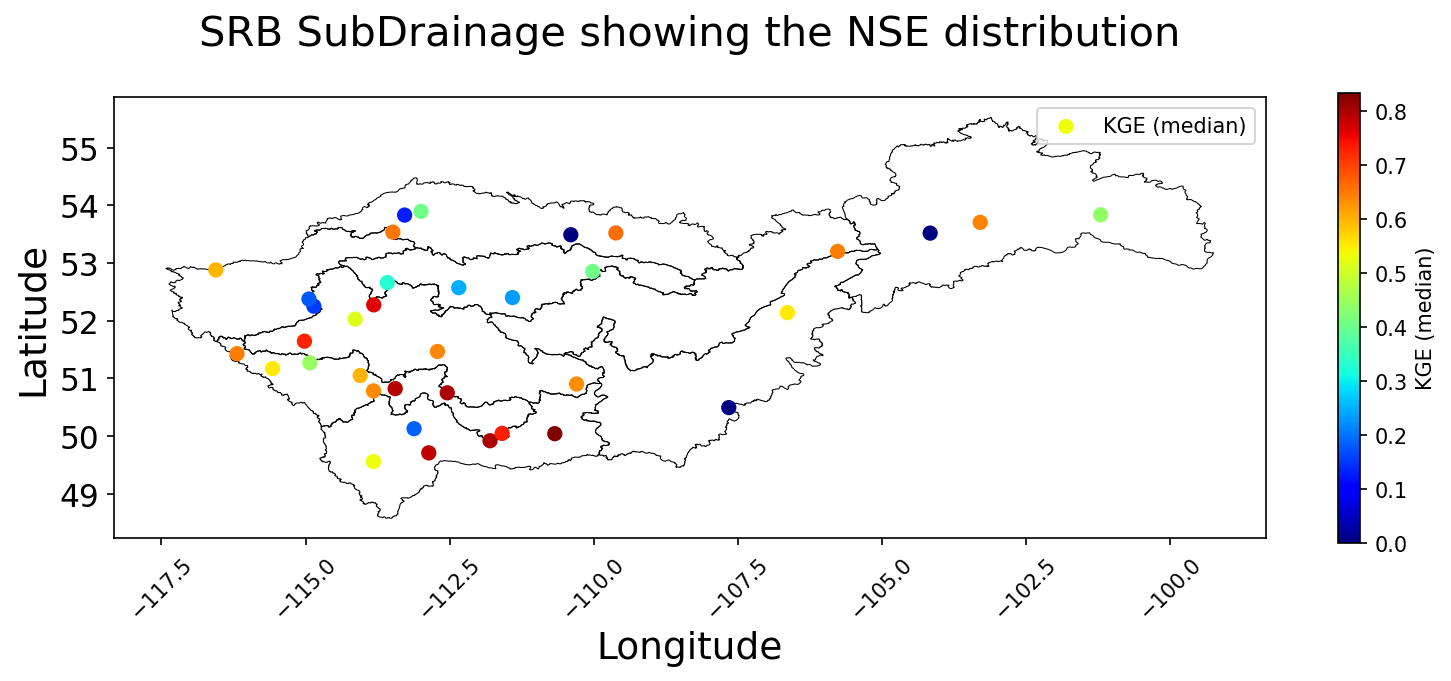

In [67]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "SRB SubDrainage showing the NSE distribution",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "KGE",
    fig_size = (24, 30),
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = [DATAFRAMES[f"DF_SIMULATED_{i+1}"] for i in range(10)],
    labels=['Longitude', 'Latitude'],
#     mode = "models",
#     models = ["model1"],
#     cmap = 'viridis',
    vmin = 0,
#     vmax=0.8,
)

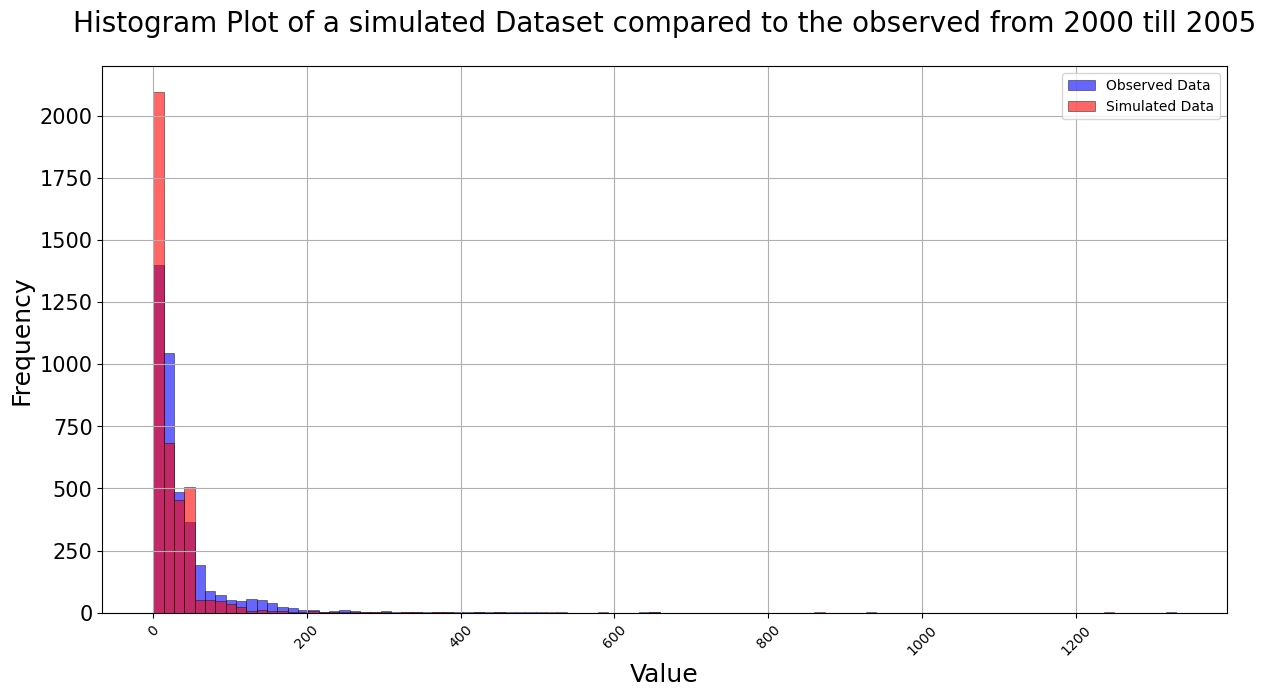

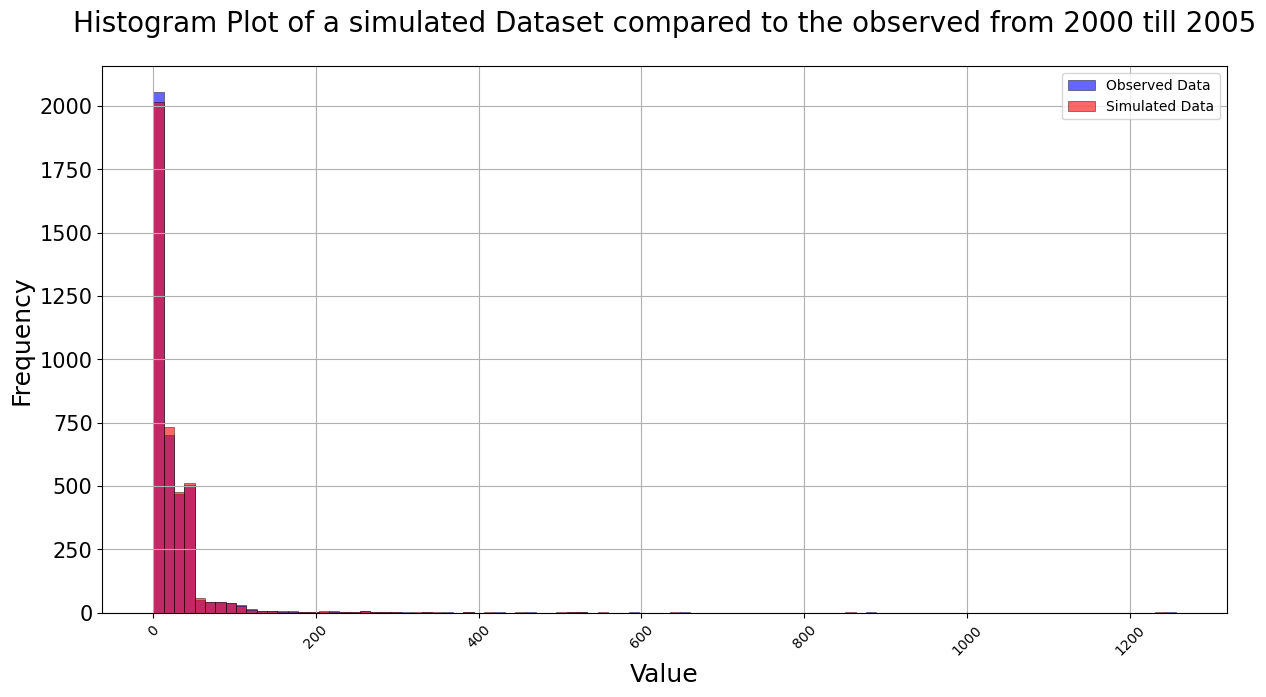

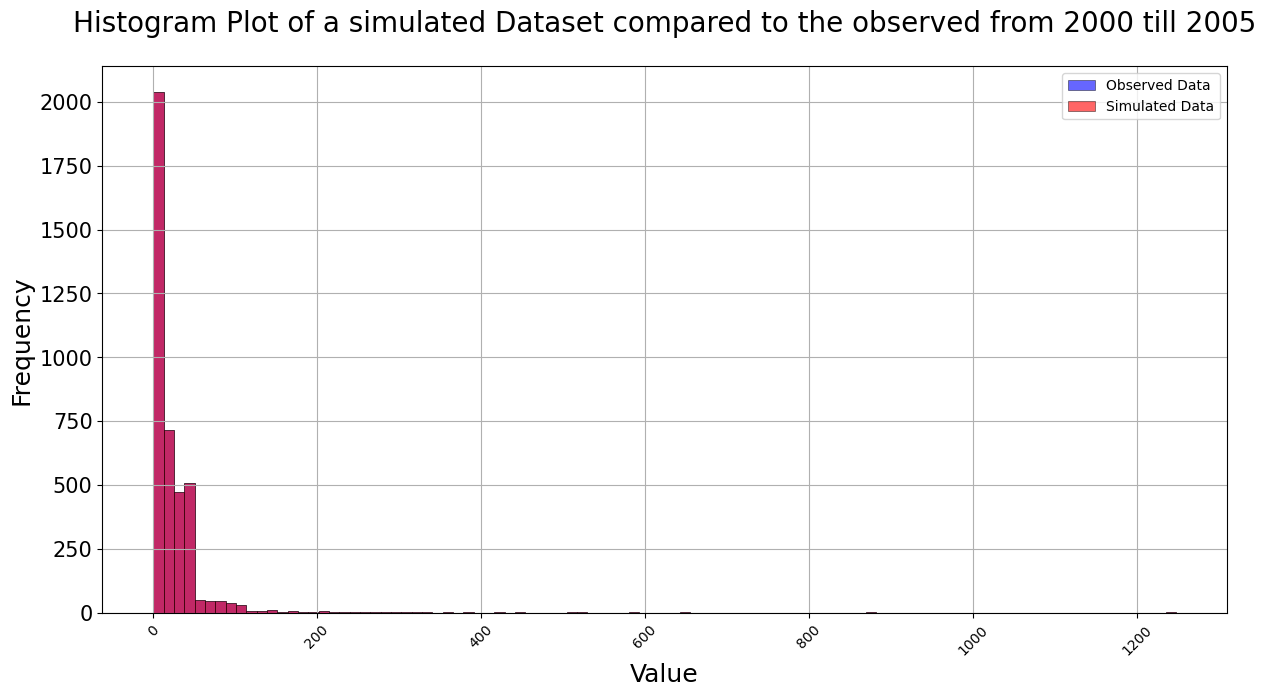

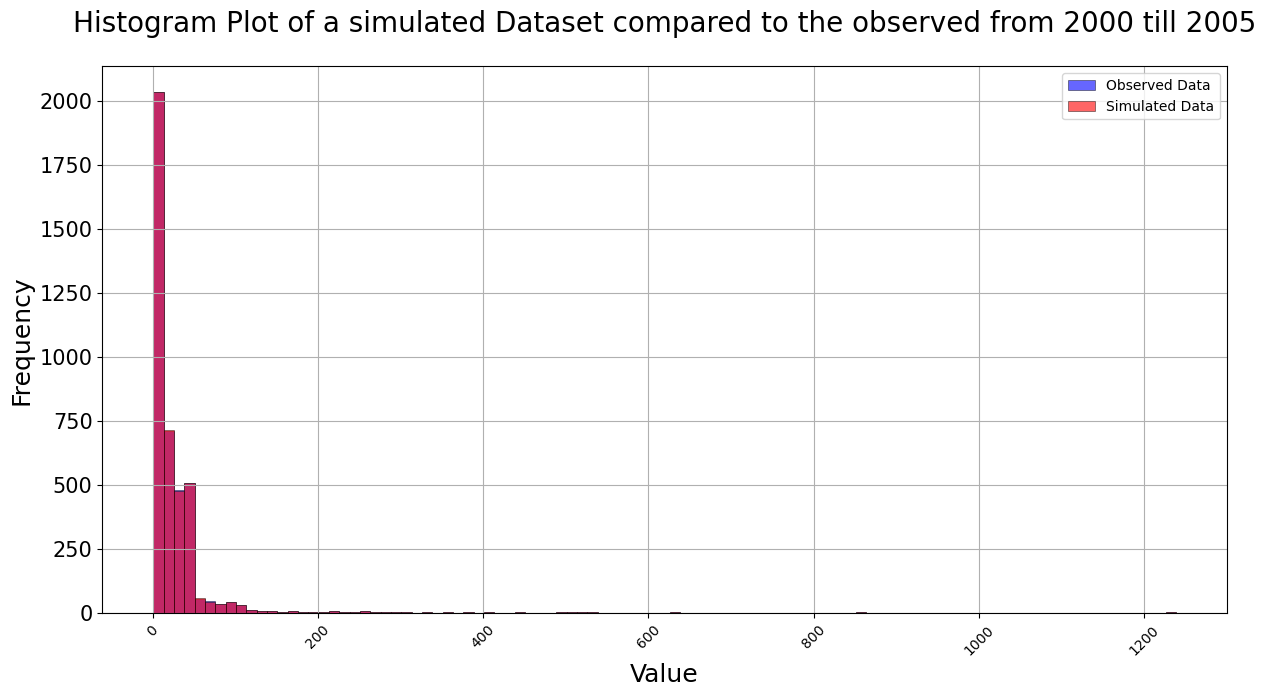

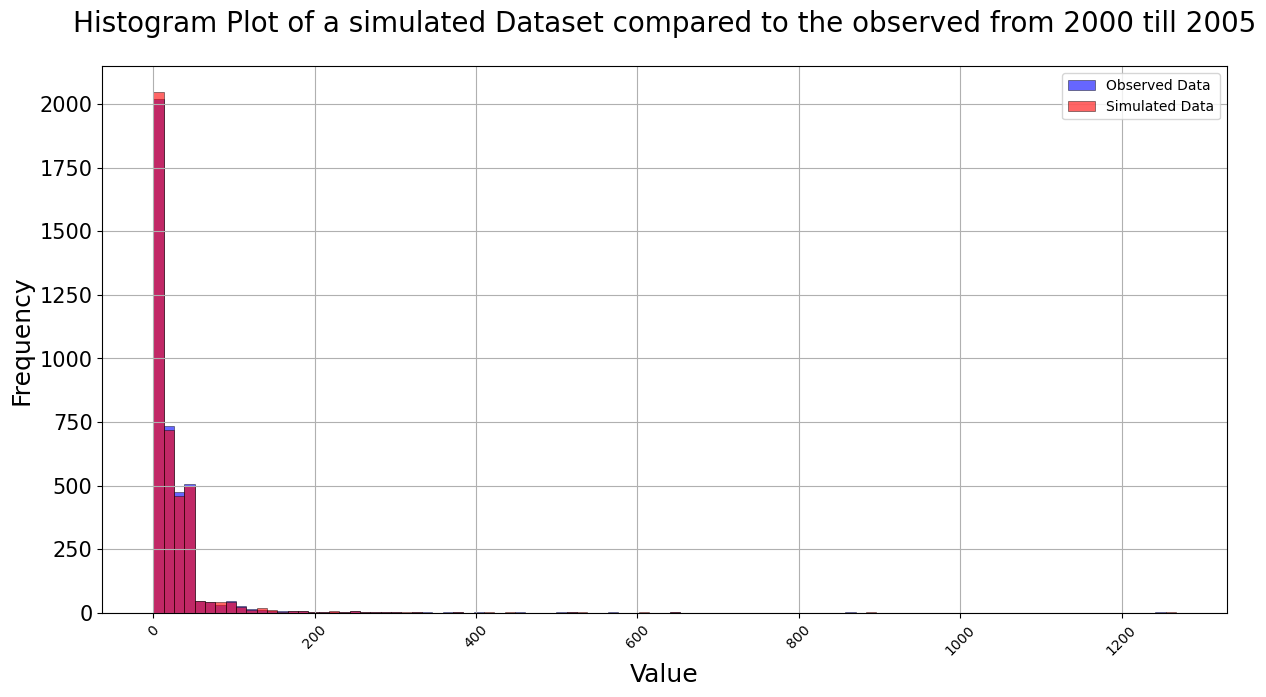

In [68]:
visuals.histogram(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, :10],
    grid = True,
    title = "Histogram Plot of a simulated Dataset compared to the observed from 2000 till 2005",
)

Number of simulated data columns: 10


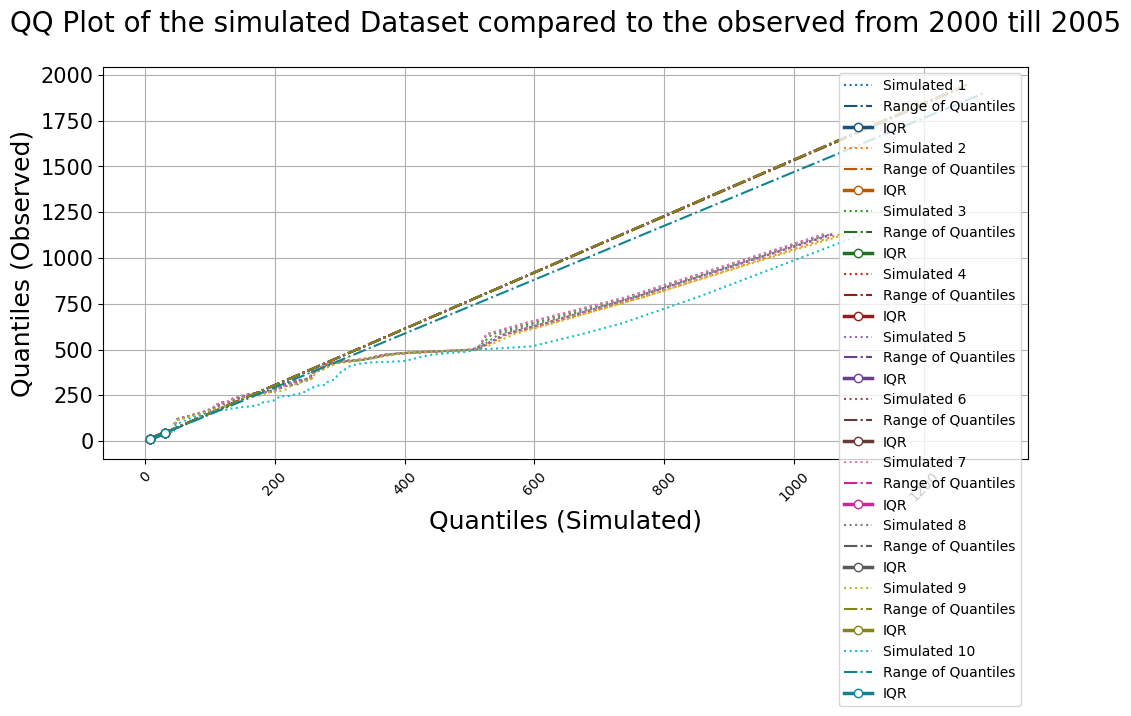

In [70]:
visuals.qqplot(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, :11],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot of the simulated Dataset compared to the observed from 2000 till 2005",
    grid = True
)

Number of simulated data columns: 10
Number of linewidths provided is less than the number of columns. Number of columns : 11. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 11. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 11. Number of legends provided is:  1. Applying Default legend names


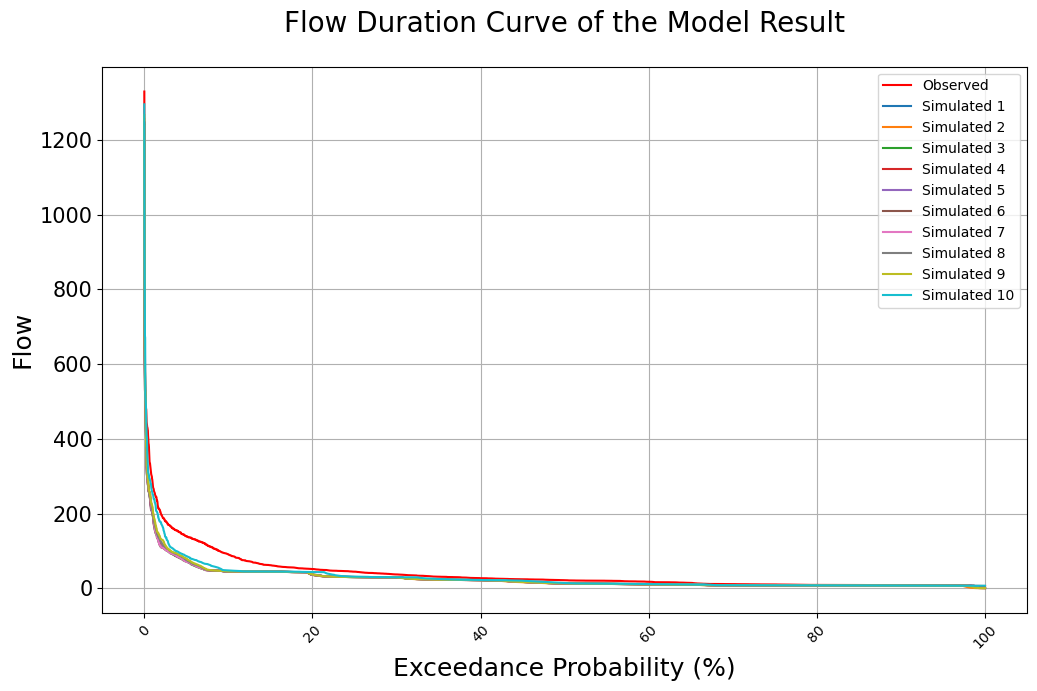

In [76]:
visuals.flow_duration_curve(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, :11],
    title='Flow Duration Curve of the Model Result',
    grid = True
)